In [340]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import math

In [2]:
with open('./execution_data.json') as result_json:
    data = json.load(result_json)
    
    result_dict = {}
    
    result_dict["task_id"] = []
    result_dict["lambda_time"] = []
    result_dict["download_time"] = []
    result_dict["upload_time"] = []
    result_dict["execution_time"] = []
    result_dict["ram"] = []
    result_dict["cost"] = []
    result_dict["ts"] = []
    
    for record in data['montage_0.35']:
        for record_key in record.keys():
            result_dict[record_key].append(record[record_key])

In [3]:

df = pd.DataFrame({"task_name" : list(result_dict["task_id"])})
df['lambda_time'] = pd.Series(list(result_dict["lambda_time"]), index=df.index)
df['download_time'] = pd.Series(list(result_dict["download_time"]), index=df.index)
df['upload_time'] = pd.Series(list(result_dict["upload_time"]), index=df.index)
df['execution_time'] = pd.Series(list(result_dict["execution_time"]), index=df.index)
df['ram'] = pd.Series(list(result_dict["ram"]), index=df.index)
df['cost'] = pd.Series(list(result_dict["cost"]), index=df.index)
df['ts'] = pd.Series(list(result_dict["ts"]), index=df.index)

In [40]:
df_csv = pd.read_csv("results.csv") 
df_csv

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.603481e+09,mDiffFit
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.603481e+09,mDiffFit
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.603481e+09,mDiffFit
3,mProject_30,13851,393,240,13216,1920,0.000434,1.603481e+09,mProject
4,mProject_30,21063,327,272,20463,1152,0.000396,1.603481e+09,mProject
...,...,...,...,...,...,...,...,...,...
48111,mDiffFit_365,379,221,43,114,3008,0.000020,1.604221e+09,mDiffFit
48112,mBackground_40,1568,216,223,1128,1024,0.000027,1.604221e+09,mBackground
48113,mBackground_65,1862,502,177,1183,1024,0.000032,1.604221e+09,mBackground
48114,mBackground_10,2050,597,213,1251,1024,0.000035,1.604221e+09,mBackground


In [5]:
df['ram_int'] = df['ram'].astype(int)

In [6]:
df['task_core'] = df['task_name'].str.split('_', n = 0, expand = True)[0]

In [7]:
Xdf_fail = df[df['lambda_time'] == -1]

In [8]:
df[df['task_core'] == 'mBackground'][df['lambda_time'] != -1].groupby(['ram']).count()

<ipython-input-8-197ee3a977e2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['task_core'] == 'mBackground'][df['lambda_time'] != -1].groupby(['ram']).count()


,task_name,lambda_time,download_time,upload_time,execution_time,cost,ts,ram_int,task_core
ram,,,,,,,,,
1024,177,177,177,177,177,177,177,177,177
1088,66,66,66,66,66,66,66,66,66
1152,3,3,3,3,3,3,3,3,3
1216,104,104,104,104,104,104,104,104,104
128,9,9,9,9,9,9,9,9,9
1280,88,88,88,88,88,88,88,88,88
1344,27,27,27,27,27,27,27,27,27
1408,146,146,146,146,146,146,146,146,146
1472,11,11,11,11,11,11,11,11,11


In [9]:
df_fail[df_fail['task_core'] == 'mBackground'].groupby(['ram']).count()

NameError: name 'df_fail' is not defined

In [10]:
df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,ram_int,task_core
0,mDiffFit_20,-1,-1,-1,-1,1536,-1.0,1604264851.3953192,1536,mDiffFit
1,mProject_24,-1,-1,-1,-1,448,-1.0,1604264851.3954284,448,mProject
2,mDiffFit_37,-1,-1,-1,-1,1536,-1.0,1604264851.395749,1536,mDiffFit
3,mDiffFit_179,-1,-1,-1,-1,1536,-1.0,1604264851.3961258,1536,mDiffFit
4,mDiffFit_380,-1,-1,-1,-1,1536,-1.0,1604264851.397529,1536,mDiffFit
...,...,...,...,...,...,...,...,...,...,...
26894,mViewer_3,-1,-1,-1,-1,192,-1.0,1604333980.30589,192,mViewer
26895,mBackground_40,-1,-1,-1,-1,192,-1.0,1604333980.306017,192,mBackground
26896,mBackground_21,-1,-1,-1,-1,256,-1.0,1604333980.308843,256,mBackground
26897,mBackground_40,-1,-1,-1,-1,256,-1.0,1604333980.3089051,256,mBackground


In [46]:
with open('./montage_0.35_single_tasks/utils/results.json') as result_json:
    data = json.load(result_json)

In [49]:
task_features_array =[]
for task in data.keys():
    task_features_array.append(data[task]['core_features'] + [task])

In [50]:
task_features_array

[[423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_8'],
 [90, 1, 0, 1, 21, 11, 2, 56, 56, 56, 2, 10, 'mProject_30'],
 [90, 1, 4, 1, 56, 28, 4, 56, 56, 56, 2, 9, 'mBackground_20'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_59'],
 [90, 1, 4, 1, 56, 28, 4, 56, 56, 56, 2, 9, 'mBackground_15'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_126'],
 [90, 1, 0, 1, 20, 10, 2, 56, 56, 56, 2, 10, 'mProject_44'],
 [90, 1, 0, 1, 20, 10, 2, 56, 56, 56, 2, 10, 'mProject_31'],
 [423, 6, 1, 1, 57, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_210'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_319'],
 [90, 1, 4, 1, 56, 28, 4, 56, 56, 56, 2, 9, 'mBackground_86'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_87'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_183'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_182'],
 [423, 6, 1, 1, 56, 45, 5, 1, 1, 1, 1, 2, 'mDiffFit_376'],
 [90, 1, 0, 1, 20, 10, 2, 56, 56, 56, 2, 10, 'mProject_38'],
 [90, 1, 0, 1, 20, 10, 2, 56, 56, 56, 2,

In [51]:
features_names = ['task_type_count', 'percentage_count', 'task_type_duplicate', 'in_min_file_size', 'in_max_file_size','in_avg_file_size','in_file_count', 'out_min_file_size', 'out_max_file_size','out_avg_file_size', 'out_file_count', 'exe_file_size', 'task_name']

In [52]:
core_df = pd.DataFrame(data=np.array(task_features_array), columns=features_names)

In [45]:
df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,ram_int,task_core
0,mDiffFit_20,-1,-1,-1,-1,1536,-1.0,1604264851.3953192,1536,mDiffFit
1,mProject_24,-1,-1,-1,-1,448,-1.0,1604264851.3954284,448,mProject
2,mDiffFit_37,-1,-1,-1,-1,1536,-1.0,1604264851.395749,1536,mDiffFit
3,mDiffFit_179,-1,-1,-1,-1,1536,-1.0,1604264851.3961258,1536,mDiffFit
4,mDiffFit_380,-1,-1,-1,-1,1536,-1.0,1604264851.397529,1536,mDiffFit
...,...,...,...,...,...,...,...,...,...,...
26894,mViewer_3,-1,-1,-1,-1,192,-1.0,1604333980.30589,192,mViewer
26895,mBackground_40,-1,-1,-1,-1,192,-1.0,1604333980.306017,192,mBackground
26896,mBackground_21,-1,-1,-1,-1,256,-1.0,1604333980.308843,256,mBackground
26897,mBackground_40,-1,-1,-1,-1,256,-1.0,1604333980.3089051,256,mBackground


In [53]:
original_df = pd.merge(df, core_df, on='task_name')
original_df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,ram_int,task_core,...,task_type_duplicate,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size
0,mDiffFit_20,-1,-1,-1,-1,1536,-1.000000,1604264851.3953192,1536,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
1,mDiffFit_20,9006,2669,274,6062,128,0.000019,1604265562.9260728,128,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
2,mDiffFit_20,2383,957,47,1360,512,0.000020,1604266554.0812998,512,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
3,mDiffFit_20,1790,422,184,1184,512,0.000015,1604266665.9826815,512,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
4,mDiffFit_20,1751,558,49,1122,512,0.000015,1604267000.791518,512,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26894,mDiffFit_204,525,394,51,81,1280,0.000013,1604327251.197862,1280,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
26895,mDiffFit_204,2856,2216,98,541,192,0.000009,1604328699.4708123,192,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
26896,mDiffFit_204,1670,1164,84,421,256,0.000007,1604329951.7685711,256,mDiffFit,...,1,1,56,45,5,1,1,1,1,2
26897,mDiffFit_204,444,326,50,66,1984,0.000016,1604330873.5152066,1984,mDiffFit,...,1,1,56,45,5,1,1,1,1,2


In [54]:
merged_csv_df = pd.merge(df_csv, core_df, on='task_name')

In [55]:
merged_csv_df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,task_type_duplicate,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.603481e+09,mDiffFit,423,...,1,1,56,45,5,1,1,1,1,2
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.603481e+09,mDiffFit,423,...,1,1,56,45,5,1,1,1,1,2
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.603481e+09,mDiffFit,423,...,1,1,56,45,5,1,1,1,1,2
3,mDiffFit_8,463,381,76,5,1152,0.000009,1.603482e+09,mDiffFit,423,...,1,1,56,45,5,1,1,1,1,2
4,mDiffFit_8,530,474,45,10,2688,0.000026,1.603483e+09,mDiffFit,423,...,1,1,56,45,5,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48111,mProject_6,14213,118,207,13887,1728,0.000402,1.604216e+09,mProject,90,...,0,1,21,11,2,56,56,56,2,10
48112,mProject_6,13516,111,148,13257,1792,0.000397,1.604216e+09,mProject,90,...,0,1,21,11,2,56,56,56,2,10
48113,mProject_6,25762,323,196,25242,960,0.000403,1.604217e+09,mProject,90,...,0,1,21,11,2,56,56,56,2,10
48114,mProject_6,23778,196,181,23401,1024,0.000397,1.604219e+09,mProject,90,...,0,1,21,11,2,56,56,56,2,10


In [240]:
df_all = pd.concat([merged_csv_df, original_df])

In [58]:
df_all

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
3,mDiffFit_8,463,381,76,5,1152,0.000009,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
4,mDiffFit_8,530,474,45,10,2688,0.000026,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26894,mDiffFit_204,525,394,51,81,1280,0.000013,1604327251.197862,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1280.0
26895,mDiffFit_204,2856,2216,98,541,192,0.000009,1604328699.4708123,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,192.0
26896,mDiffFit_204,1670,1164,84,421,256,0.000007,1604329951.7685711,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,256.0
26897,mDiffFit_204,444,326,50,66,1984,0.000016,1604330873.5152066,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1984.0


In [241]:
df_all.reset_index(drop=True, inplace=True)
df_all

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
3,mDiffFit_8,463,381,76,5,1152,0.000009,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
4,mDiffFit_8,530,474,45,10,2688,0.000026,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75010,mDiffFit_204,525,394,51,81,1280,0.000013,1604327251.197862,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1280.0
75011,mDiffFit_204,2856,2216,98,541,192,0.000009,1604328699.4708123,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,192.0
75012,mDiffFit_204,1670,1164,84,421,256,0.000007,1604329951.7685711,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,256.0
75013,mDiffFit_204,444,326,50,66,1984,0.000016,1604330873.5152066,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1984.0


In [242]:
df_all['ram'] = pd.to_numeric(df_all['ram'])
len(list(set(df_all['ram'].values)))


46

In [325]:
df_all_new = df_all[(df_all['ram'] < 900) | (df_all['task_core'] != 'mProject') | (df_all['cost'] != -1)]
df_all_new = df_all_new[(df_all_new['ram'] < 400)|(failed_df['task_core'] != 'mAdd') | (df_all['cost'] != -1)]
df_all_new = df_all_new[(df_all_new['ram'] < 256)|(failed_df['task_core'] != 'mBackground') | (df_all['cost'] != -1)]
df_all_new = df_all_new[(df_all_new['ram'] < 400)|(failed_df['task_core'] != 'mViewer') | (df_all['cost'] != -1)]
df_all_new = df_all_new[(df_all_new['ram'] < 0)|(failed_df['task_core'] != 'mBgModel') | (df_all['cost'] != -1)]
df_all_new = df_all_new[(df_all_new['ram'] < 200)|(failed_df['task_core'] != 'mDiffFit') | (df_all['cost'] != -1)]
df_all_new = df_all_new[(df_all_new['ram'] < 0)|(failed_df['task_core'] != 'mConcatFit') | (df_all['cost'] != -1)]

<ipython-input-325-63929ec8c51c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_new = df_all_new[(df_all_new['ram'] < 400)|(failed_df['task_core'] != 'mAdd') | (df_all['cost'] != -1)]
<ipython-input-325-63929ec8c51c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_new = df_all_new[(df_all_new['ram'] < 256)|(failed_df['task_core'] != 'mBackground') | (df_all['cost'] != -1)]
<ipython-input-325-63929ec8c51c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_new = df_all_new[(df_all_new['ram'] < 400)|(failed_df['task_core'] != 'mViewer') | (df_all['cost'] != -1)]
<ipython-input-325-63929ec8c51c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_new = df_all_new[(df_all_new['ram'] < 0)|(failed_df['task_core'] != 'mBgModel') | (df_all['cost'] != -1)]
<ipython-input-325-63929ec8c51c>:6: UserWarning: Boolean Series key will be reindexed to

In [326]:
df_all_new

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
3,mDiffFit_8,463,381,76,5,1152,0.000009,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
4,mDiffFit_8,530,474,45,10,2688,0.000026,1.60348e+09,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75010,mDiffFit_204,525,394,51,81,1280,0.000013,1604327251.197862,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1280.0
75011,mDiffFit_204,2856,2216,98,541,192,0.000009,1604328699.4708123,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,192.0
75012,mDiffFit_204,1670,1164,84,421,256,0.000007,1604329951.7685711,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,256.0
75013,mDiffFit_204,444,326,50,66,1984,0.000016,1604330873.5152066,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1984.0


In [260]:
good_df = df_all[df_all['cost'] != -1]
good_df[good_df['lambda_time'] > 20000][good_df['task_core'] != 'mProject']

<ipython-input-260-dc7bef2692f2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_df[good_df['lambda_time'] > 20000][good_df['task_core'] != 'mProject']


,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
2842,mBgModel_1,20477,198,76,20201,256,0.000085,1.60419e+09,mBgModel,3,...,1,1,1,2,1,1,1,1,2,NaN
5891,mBackground_6,25840,4659,879,20320,128,0.000054,1.60419e+09,mBackground,90,...,1,56,28,4,56,56,56,2,9,NaN
9194,mBackground_16,21001,4100,820,16061,128,0.000044,1.60349e+09,mBackground,90,...,1,56,28,4,56,56,56,2,9,NaN
9327,mBgModel_3,21155,421,74,20661,256,0.000088,1.60419e+09,mBgModel,3,...,1,1,1,2,1,1,1,1,2,NaN
36151,mViewer_4,24609,4943,202,19459,256,0.000103,1.60421e+09,mViewer,4,...,88,88,88,3,25,25,25,1,8,NaN
52474,mBgModel_3,20649,272,96,20281,256,0.000086,1604269233.3404555,mBgModel,3,...,1,1,1,2,1,1,1,1,2,256.0
52476,mBgModel_3,21351,394,96,20860,256,0.000089,1604269486.4177902,mBgModel,3,...,1,1,1,2,1,1,1,1,2,256.0
52512,mBgModel_3,20914,250,102,20562,256,0.000088,1604325590.0813744,mBgModel,3,...,1,1,1,2,1,1,1,1,2,256.0
52514,mBgModel_3,20480,166,73,20241,256,0.000085,1604326696.0522287,mBgModel,3,...,1,1,1,2,1,1,1,1,2,256.0
52516,mBgModel_3,20792,255,96,20440,256,0.000087,1604329777.6341796,mBgModel,3,...,1,1,1,2,1,1,1,1,2,256.0


In [314]:
good_df[good_df['task_core'] =='mConcatFit'][good_df['ram']  == 128]

<ipython-input-314-27467d0772b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_df[good_df['task_core'] =='mConcatFit'][good_df['ram']  == 128]


,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
29274,mConcatFit_2,14675,6779,185,7701,128,0.000031,1.60352e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
29275,mConcatFit_2,10971,5911,258,4823,128,0.000023,1.60353e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
29276,mConcatFit_2,10895,6641,213,4040,128,0.000023,1.60417e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
29717,mConcatFit_1,11682,6703,339,4639,128,0.000024,1.60352e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
29718,mConcatFit_1,15470,7081,168,8222,128,0.000032,1.60353e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
36468,mConcatFit_3,13909,8360,259,5280,128,0.000029,1.60352e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
36477,mConcatFit_3,16480,7560,298,8621,128,0.000034,1.60417e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN
36478,mConcatFit_3,16200,7759,180,8260,128,0.000034,1.60417e+09,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,NaN


In [246]:
failed_df = df_all[df_all['cost'] == -1]
failed_df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
48116,mDiffFit_20,-1,-1,-1,-1,1536,-1.0,1604264851.3953192,mDiffFit,423,...,1,56,45,5,1,1,1,1,2,1536.0
48163,mProject_24,-1,-1,-1,-1,448,-1.0,1604264851.3954284,mProject,90,...,1,21,11,2,56,56,56,2,10,448.0
48164,mProject_24,-1,-1,-1,-1,256,-1.0,1604270199.2685072,mProject,90,...,1,21,11,2,56,56,56,2,10,256.0
48166,mProject_24,-1,-1,-1,-1,384,-1.0,1604270862.2183104,mProject,90,...,1,21,11,2,56,56,56,2,10,384.0
48175,mProject_24,-1,-1,-1,-1,256,-1.0,1604282315.487377,mProject,90,...,1,21,11,2,56,56,56,2,10,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74969,mBackground_24,-1,-1,-1,-1,192,-1.0,1604307794.4784718,mBackground,90,...,1,56,28,4,56,56,56,2,9,192.0
74970,mBackground_24,-1,-1,-1,-1,320,-1.0,1604308829.9503188,mBackground,90,...,1,56,28,4,56,56,56,2,9,320.0
74971,mBackground_24,-1,-1,-1,-1,256,-1.0,1604308908.1074605,mBackground,90,...,1,56,28,4,56,56,56,2,9,256.0
74975,mBackground_24,-1,-1,-1,-1,192,-1.0,1604317644.4025292,mBackground,90,...,1,56,28,4,56,56,56,2,9,192.0


In [316]:
failed_df[failed_df['ram'] > 0][failed_df['task_core'] == 'mConcatFit']

<ipython-input-316-52b1fa1202b3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed_df[failed_df['ram'] < 400][failed_df['task_core'] == 'mConcatFit']


,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,task_type_count,...,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,ram_int
58961,mConcatFit_2,-1,-1,-1,-1,192,-1.0,1604319821.2189612,mConcatFit,3,...,1,1,1,142,1,1,1,1,2,192.0


In [107]:
pd.to_datetime(df_all['ts'], unit='s').dt.day_name()

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
75010    Monday
75011    Monday
75012    Monday
75013    Monday
75014    Monday
Name: ts, Length: 75015, dtype: object

In [60]:
def feature_engineer(df):
    features_df = pd.DataFrame()
    df['ram'] = pd.to_numeric(df['ram']).astype('category')
    features_df['ram'] = df['ram'].cat.codes
    
    df['day_of_week'] = pd.to_datetime(df_all['ts'], unit='s').dt.day_name().astype('category')
    features_df['hour'] = pd.to_datetime(df_all['ts'], unit='s').dt.hour
    features_df['minute'] = pd.to_datetime(df_all['ts'], unit='s').dt.minute
    features_df['seconds'] = pd.to_datetime(df_all['ts'], unit='s').dt.minute
    features_df['weekday'] = df['day_of_week'].cat.codes
    features_df['task_type_count'] = df['task_type_count']
    features_df['in_min_file_size'] = df['in_min_file_size']
    features_df['in_max_file_size'] = df['in_max_file_size']
    features_df['in_avg_file_size'] = df['in_avg_file_size']
    features_df['in_file_count'] = df['in_file_count']
    features_df['out_min_file_size'] = df['out_min_file_size']
    features_df['out_max_file_size'] = df['out_max_file_size']
    features_df['out_avg_file_size'] = df['out_avg_file_size']
    features_df['out_file_count'] = df['out_file_count']
    features_df['exe_file_size'] = df['exe_file_size']
    df['core'] = df['task_core'].astype('category')
    features_df['task_core'] = df['core'].cat.codes
    return features_df 

In [328]:
features_df = feature_engineer(df_all_new)
features_df

,ram,hour,minute,seconds,weekday,task_type_count,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,task_core
0,44,19,28,28,0,423,1,56,45,5,1,1,1,1,2,4
1,44,19,30,30,0,423,1,56,45,5,1,1,1,1,2,4
2,16,19,30,30,0,423,1,56,45,5,1,1,1,1,2,4
3,16,19,36,36,0,423,1,56,45,5,1,1,1,1,2,4
4,40,19,53,53,0,423,1,56,45,5,1,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75010,18,14,27,27,1,423,1,56,45,5,1,1,1,1,2,4
75011,1,14,51,51,1,423,1,56,45,5,1,1,1,1,2,4
75012,2,15,12,12,1,423,1,56,45,5,1,1,1,1,2,4
75013,29,15,27,27,1,423,1,56,45,5,1,1,1,1,2,4


In [136]:
features_df[features_df['task_core'] != 4]

,ram,hour,minute,seconds,weekday,task_type_count,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,task_core
114,28,19,31,31,0,90,1,21,11,2,56,56,56,2,10,6
115,16,19,31,31,0,90,1,21,11,2,56,56,56,2,10,6
116,16,19,36,36,0,90,1,21,11,2,56,56,56,2,10,6
117,40,19,53,53,0,90,1,21,11,2,56,56,56,2,10,6
118,16,19,53,53,0,90,1,21,11,2,56,56,56,2,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74977,1,14,22,22,1,90,1,56,28,4,56,56,56,2,9,1
74978,3,14,43,43,1,90,1,56,28,4,56,56,56,2,9,1
74979,1,14,53,53,1,90,1,56,28,4,56,56,56,2,9,1
74980,1,15,15,15,1,90,1,56,28,4,56,56,56,2,9,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee39216130>]],
      dtype=object)

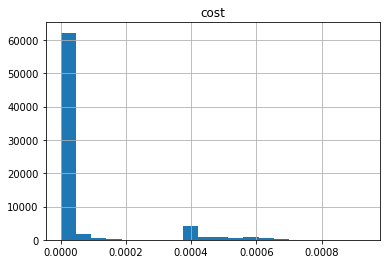

In [102]:
df_all[df_all['cost'] != -1].hist(column='cost', bins=20)

In [62]:
features_df

,ram,hour,minute,seconds,weekday,task_type_count,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,task_core
0,44,19,28,28,0,423,1,56,45,5,1,1,1,1,2,4
1,44,19,30,30,0,423,1,56,45,5,1,1,1,1,2,4
2,16,19,30,30,0,423,1,56,45,5,1,1,1,1,2,4
3,16,19,36,36,0,423,1,56,45,5,1,1,1,1,2,4
4,40,19,53,53,0,423,1,56,45,5,1,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75010,18,14,27,27,1,423,1,56,45,5,1,1,1,1,2,4
75011,1,14,51,51,1,423,1,56,45,5,1,1,1,1,2,4
75012,2,15,12,12,1,423,1,56,45,5,1,1,1,1,2,4
75013,29,15,27,27,1,423,1,56,45,5,1,1,1,1,2,4


In [329]:
df_all_new = df_all_new['lambda_time'].replace(-1, 30000)

In [330]:
df_all_new.to_csv('y_time_pred_data.csv', index=False)
features_df.to_csv('x_time_pred_data.csv', index=False)

In [146]:
pd.read_csv('x_time_pred_data.csv')

,ram,hour,minute,seconds,weekday,task_type_count,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,task_core
0,44,19,28,28,0,423,1,56,45,5,1,1,1,1,2,4
1,44,19,30,30,0,423,1,56,45,5,1,1,1,1,2,4
2,16,19,30,30,0,423,1,56,45,5,1,1,1,1,2,4
3,16,19,36,36,0,423,1,56,45,5,1,1,1,1,2,4
4,40,19,53,53,0,423,1,56,45,5,1,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75010,18,14,27,27,1,423,1,56,45,5,1,1,1,1,2,4
75011,1,14,51,51,1,423,1,56,45,5,1,1,1,1,2,4
75012,2,15,12,12,1,423,1,56,45,5,1,1,1,1,2,4
75013,29,15,27,27,1,423,1,56,45,5,1,1,1,1,2,4


In [67]:
x = features_df.values
y = df_all.values

x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [68]:
ann = tf.keras.models.Sequential()

In [159]:
ann.add(Dense(units=25, activation='sigmoid'))
ann.add(Dense(units=25, activation='sigmoid'))
ann.add(Dense(units=1))

In [160]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [165]:
x_train, y_train, x_test, y_test = data()
ann.fit(x_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
1876/1876 [==============================] - 1s 601us/step - loss: 58152756.0000
Epoch 2/200
1876/1876 [==============================] - 1s 533us/step - loss: 57911656.0000
Epoch 3/200
1876/1876 [==============================] - 1s 528us/step - loss: 57676196.0000
Epoch 4/200
1876/1876 [==============================] - 1s 531us/step - loss: 57446120.0000
Epoch 5/200
1876/1876 [==============================] - 1s 568us/step - loss: 57217724.0000
Epoch 6/200
1876/1876 [==============================] - 1s 538us/step - loss: 56994976.0000
Epoch 7/200
1876/1876 [==============================] - 1s 541us/step - loss: 56776664.0000
Epoch 8/200
1876/1876 [==============================] - 1s 555us/step - loss: 56562920.0000
Epoch 9/200
1557/1876 [=======================>......] - ETA: 0s - loss: 56829736.0000

KeyboardInterrupt: 

In [345]:
y_df = pd.read_csv('y_time_pred_data.csv')['lambda_time'].apply(lambda x: int(math.ceil(x / 100.0)))
y_df

0         5
1         4
2         8
3         5
4         6
         ..
74578     6
74579    29
74580    17
74581     5
74582    18
Name: lambda_time, Length: 74583, dtype: int64

In [72]:
y_pred = ann.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[2747.32 2360.  ]
 [ 354.35  210.  ]
 [1603.13 1149.  ]
 ...
 [ 348.37  577.  ]
 [2115.09 1350.  ]
 [1785.59 1340.  ]]


In [352]:
def model(x_train, y_train, x_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(Dense({{choice([20,30,40,50])}}))
    model.add(Activation('relu'))
    model.add(Dropout(0.05630397313742258))
    model.add(Dense({{choice([20,30])}}))
    model.add(Activation('relu'))
    model.add(Dropout(0.1817486747050165))
    
    model.add(Dense({{choice([10,20])}}))
    model.add(Activation('relu'))
    model.add(Dropout(0.03605068941630271))
        
    model.add(Dense(1))
    
    optim = keras.optimizers.RMSprop(lr=10**-3)
        
    model.compile(loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()],optimizer=optim)
        
    model.fit(x_train, y_train,
              batch_size=64,
              epochs={{choice([100, 200, 500])}},
              verbose=2)

    y_pred = model.predict(x_test)
    y_pred = np.nan_to_num(y_pred)
    error = mean_squared_error(y_test, y_pred)
    print('Test error:', error)
    return {'loss': error, 'status': STATUS_OK, 'model': model}

In [353]:
def data():
    
    df_x = pd.read_csv('x_time_pred_data.csv')
    df_y = pd.read_csv('y_time_pred_data.csv')['lambda_time'].apply(lambda x: int(math.ceil(x / 100.0)))

    x = df_x.values
    y = df_y.values

    x = np.asarray(x).astype('float32')
    y = np.asarray(y).astype('float32')
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
    return x_train, y_train, x_test, y_test

In [354]:
x_train, y_train, x_test, y_test = data()

best_run, best_model = optim.minimize(model=model, data = data,
                                      algo=tpe.suggest,
                                      max_evals=50,
                                      trials=Trials(),
                                      notebook_name='an-lambda-execution-time-prediction')

>>> Imports:
#coding=utf-8

try:
    import json
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from tensorflow.keras.layers import Dense, Dropout, Activation
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from sklearn.metrics import mean_squared_error
except:
    pass

try:
    import math
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dense': hp.choice('Dense', [20,30,40,50]),
        'Dense_1': hp.choice('Dense_1', [20,30]),
        'Dense_2': hp.choice('Dense_2', [10,20]),
        'epochs': hp.choice('epochs', [1

933/933 - 1s - loss: 199.6932 - mean_squared_error: 199.6932

Epoch 49/500                                          
933/933 - 1s - loss: 201.3733 - mean_squared_error: 201.3733

Epoch 50/500                                          
933/933 - 1s - loss: 193.7744 - mean_squared_error: 193.7744

Epoch 51/500                                          
933/933 - 1s - loss: 190.5588 - mean_squared_error: 190.5588

Epoch 52/500                                          
933/933 - 1s - loss: 190.2347 - mean_squared_error: 190.2347

Epoch 53/500                                          
933/933 - 1s - loss: 192.3863 - mean_squared_error: 192.3863

Epoch 54/500                                          
933/933 - 1s - loss: 198.6559 - mean_squared_error: 198.6559

Epoch 55/500                                          
933/933 - 1s - loss: 188.1690 - mean_squared_error: 188.1690

Epoch 56/500                                          
933/933 - 1s - loss: 189.9068 - mean_squared_error: 189.9068

Ep

933/933 - 1s - loss: 168.5625 - mean_squared_error: 168.5625

Epoch 119/500                                         
933/933 - 1s - loss: 170.6597 - mean_squared_error: 170.6597

Epoch 120/500                                         
933/933 - 1s - loss: 173.4976 - mean_squared_error: 173.4976

Epoch 121/500                                         
933/933 - 1s - loss: 174.0314 - mean_squared_error: 174.0314

Epoch 122/500                                         
933/933 - 1s - loss: 170.5418 - mean_squared_error: 170.5418

Epoch 123/500                                         
933/933 - 1s - loss: 167.4937 - mean_squared_error: 167.4937

Epoch 124/500                                         
933/933 - 1s - loss: 177.4364 - mean_squared_error: 177.4364

Epoch 125/500                                         
933/933 - 1s - loss: 167.1285 - mean_squared_error: 167.1285

Epoch 126/500                                         
933/933 - 1s - loss: 169.6309 - mean_squared_error: 169.6309

Ep

933/933 - 1s - loss: 165.6924 - mean_squared_error: 165.6924

Epoch 189/500                                         
933/933 - 1s - loss: 165.3076 - mean_squared_error: 165.3076

Epoch 190/500                                         
933/933 - 1s - loss: 162.7519 - mean_squared_error: 162.7519

Epoch 191/500                                         
933/933 - 1s - loss: 169.4186 - mean_squared_error: 169.4186

Epoch 192/500                                         
933/933 - 1s - loss: 168.1337 - mean_squared_error: 168.1337

Epoch 193/500                                         
933/933 - 1s - loss: 166.4547 - mean_squared_error: 166.4547

Epoch 194/500                                         
933/933 - 1s - loss: 166.8140 - mean_squared_error: 166.8140

Epoch 195/500                                         
933/933 - 1s - loss: 160.5968 - mean_squared_error: 160.5968

Epoch 196/500                                         
933/933 - 1s - loss: 165.1325 - mean_squared_error: 165.1325

Ep

933/933 - 1s - loss: 158.9720 - mean_squared_error: 158.9720

Epoch 259/500                                         
933/933 - 1s - loss: 160.6214 - mean_squared_error: 160.6214

Epoch 260/500                                         
933/933 - 1s - loss: 158.4556 - mean_squared_error: 158.4556

Epoch 261/500                                         
933/933 - 1s - loss: 161.0168 - mean_squared_error: 161.0168

Epoch 262/500                                         
933/933 - 1s - loss: 165.4113 - mean_squared_error: 165.4113

Epoch 263/500                                         
933/933 - 1s - loss: 160.8870 - mean_squared_error: 160.8870

Epoch 264/500                                         
933/933 - 1s - loss: 156.4339 - mean_squared_error: 156.4339

Epoch 265/500                                         
933/933 - 1s - loss: 160.9592 - mean_squared_error: 160.9592

Epoch 266/500                                         
933/933 - 1s - loss: 158.5928 - mean_squared_error: 158.5928

Ep

933/933 - 1s - loss: 157.0002 - mean_squared_error: 157.0002

Epoch 329/500                                         
933/933 - 1s - loss: 158.4921 - mean_squared_error: 158.4921

Epoch 330/500                                         
933/933 - 1s - loss: 156.7007 - mean_squared_error: 156.7007

Epoch 331/500                                         
933/933 - 1s - loss: 165.3776 - mean_squared_error: 165.3776

Epoch 332/500                                         
933/933 - 1s - loss: 147.7786 - mean_squared_error: 147.7786

Epoch 333/500                                         
933/933 - 1s - loss: 158.2234 - mean_squared_error: 158.2234

Epoch 334/500                                         
933/933 - 1s - loss: 163.3116 - mean_squared_error: 163.3116

Epoch 335/500                                         
933/933 - 1s - loss: 155.4754 - mean_squared_error: 155.4754

Epoch 336/500                                         
933/933 - 1s - loss: 155.9869 - mean_squared_error: 155.9869

Ep

933/933 - 1s - loss: 158.9933 - mean_squared_error: 158.9933

Epoch 399/500                                         
933/933 - 1s - loss: 156.3328 - mean_squared_error: 156.3328

Epoch 400/500                                         
933/933 - 1s - loss: 152.3680 - mean_squared_error: 152.3680

Epoch 401/500                                         
933/933 - 1s - loss: 155.7373 - mean_squared_error: 155.7373

Epoch 402/500                                         
933/933 - 1s - loss: 150.8883 - mean_squared_error: 150.8883

Epoch 403/500                                         
933/933 - 1s - loss: 152.2352 - mean_squared_error: 152.2352

Epoch 404/500                                         
933/933 - 1s - loss: 153.0683 - mean_squared_error: 153.0683

Epoch 405/500                                         
933/933 - 1s - loss: 156.6402 - mean_squared_error: 156.6402

Epoch 406/500                                         
933/933 - 1s - loss: 159.1259 - mean_squared_error: 159.1259

Ep

933/933 - 1s - loss: 151.3479 - mean_squared_error: 151.3479

Epoch 469/500                                         
933/933 - 1s - loss: 159.8649 - mean_squared_error: 159.8649

Epoch 470/500                                         
933/933 - 1s - loss: 156.0638 - mean_squared_error: 156.0638

Epoch 471/500                                         
933/933 - 1s - loss: 151.7649 - mean_squared_error: 151.7649

Epoch 472/500                                         
933/933 - 1s - loss: 157.4420 - mean_squared_error: 157.4420

Epoch 473/500                                         
933/933 - 1s - loss: 150.6432 - mean_squared_error: 150.6432

Epoch 474/500                                         
933/933 - 1s - loss: 157.8206 - mean_squared_error: 157.8206

Epoch 475/500                                         
933/933 - 1s - loss: 150.7317 - mean_squared_error: 150.7317

Epoch 476/500                                         
933/933 - 1s - loss: 151.1718 - mean_squared_error: 151.1718

Ep

933/933 - 1s - loss: 217.7942 - mean_squared_error: 217.7942                      

Epoch 27/100                                                                      
933/933 - 1s - loss: 226.9012 - mean_squared_error: 226.9012                      

Epoch 28/100                                                                      
933/933 - 1s - loss: 214.0334 - mean_squared_error: 214.0334                      

Epoch 29/100                                                                      
933/933 - 1s - loss: 224.9101 - mean_squared_error: 224.9101                      

Epoch 30/100                                                                      
933/933 - 1s - loss: 221.2634 - mean_squared_error: 221.2634                      

Epoch 31/100                                                                      
933/933 - 1s - loss: 215.8032 - mean_squared_error: 215.8032                      

Epoch 32/100                                                                     

933/933 - 1s - loss: 199.4738 - mean_squared_error: 199.4738                      

Epoch 76/100                                                                      
933/933 - 1s - loss: 197.2573 - mean_squared_error: 197.2573                      

Epoch 77/100                                                                      
933/933 - 1s - loss: 193.2608 - mean_squared_error: 193.2608                      

Epoch 78/100                                                                      
933/933 - 1s - loss: 196.4253 - mean_squared_error: 196.4253                      

Epoch 79/100                                                                      
933/933 - 1s - loss: 198.1838 - mean_squared_error: 198.1838                      

Epoch 80/100                                                                      
933/933 - 1s - loss: 191.5195 - mean_squared_error: 191.5195                      

Epoch 81/100                                                                     

933/933 - 1s - loss: 274.9600 - mean_squared_error: 274.9600                      

Epoch 24/200                                                                      
933/933 - 1s - loss: 273.5965 - mean_squared_error: 273.5965                      

Epoch 25/200                                                                      
933/933 - 1s - loss: 264.7007 - mean_squared_error: 264.7007                      

Epoch 26/200                                                                      
933/933 - 1s - loss: 276.2225 - mean_squared_error: 276.2225                      

Epoch 27/200                                                                      
933/933 - 1s - loss: 253.3643 - mean_squared_error: 253.3643                      

Epoch 28/200                                                                      
933/933 - 1s - loss: 262.7635 - mean_squared_error: 262.7635                      

Epoch 29/200                                                                     

933/933 - 1s - loss: 230.1129 - mean_squared_error: 230.1129                      

Epoch 73/200                                                                      
933/933 - 1s - loss: 223.7144 - mean_squared_error: 223.7144                      

Epoch 74/200                                                                      
933/933 - 1s - loss: 229.4544 - mean_squared_error: 229.4544                      

Epoch 75/200                                                                      
933/933 - 1s - loss: 224.6544 - mean_squared_error: 224.6544                      

Epoch 76/200                                                                      
933/933 - 1s - loss: 223.9189 - mean_squared_error: 223.9189                      

Epoch 77/200                                                                      
933/933 - 1s - loss: 225.7158 - mean_squared_error: 225.7158                      

Epoch 78/200                                                                     

933/933 - 1s - loss: 221.6474 - mean_squared_error: 221.6474                      

Epoch 122/200                                                                     
933/933 - 1s - loss: 226.4301 - mean_squared_error: 226.4301                      

Epoch 123/200                                                                     
933/933 - 1s - loss: 219.8884 - mean_squared_error: 219.8884                      

Epoch 124/200                                                                     
933/933 - 1s - loss: 220.8285 - mean_squared_error: 220.8285                      

Epoch 125/200                                                                     
933/933 - 1s - loss: 223.9843 - mean_squared_error: 223.9843                      

Epoch 126/200                                                                     
933/933 - 1s - loss: 215.5825 - mean_squared_error: 215.5825                      

Epoch 127/200                                                                    

933/933 - 1s - loss: 221.2396 - mean_squared_error: 221.2396                      

Epoch 171/200                                                                     
933/933 - 1s - loss: 216.1239 - mean_squared_error: 216.1239                      

Epoch 172/200                                                                     
933/933 - 1s - loss: 217.0897 - mean_squared_error: 217.0897                      

Epoch 173/200                                                                     
933/933 - 1s - loss: 212.5925 - mean_squared_error: 212.5925                      

Epoch 174/200                                                                     
933/933 - 1s - loss: 219.5634 - mean_squared_error: 219.5634                      

Epoch 175/200                                                                     
933/933 - 1s - loss: 213.0552 - mean_squared_error: 213.0552                      

Epoch 176/200                                                                    

Epoch 18/200                                                                       
933/933 - 1s - loss: 235.6387 - mean_squared_error: 235.6387                       

Epoch 19/200                                                                       
933/933 - 1s - loss: 230.2126 - mean_squared_error: 230.2126                       

Epoch 20/200                                                                       
933/933 - 1s - loss: 230.7853 - mean_squared_error: 230.7853                       

Epoch 21/200                                                                       
933/933 - 1s - loss: 228.4961 - mean_squared_error: 228.4961                       

Epoch 22/200                                                                       
933/933 - 1s - loss: 224.9070 - mean_squared_error: 224.9070                       

Epoch 23/200                                                                       
933/933 - 1s - loss: 218.0756 - mean_squared_error: 218.0756           

Epoch 66/200                                                                       
933/933 - 1s - loss: 185.4838 - mean_squared_error: 185.4838                       

Epoch 67/200                                                                       
933/933 - 1s - loss: 179.1660 - mean_squared_error: 179.1660                       

Epoch 68/200                                                                       
933/933 - 1s - loss: 187.0109 - mean_squared_error: 187.0109                       

Epoch 69/200                                                                       
933/933 - 1s - loss: 184.5288 - mean_squared_error: 184.5288                       

Epoch 70/200                                                                       
933/933 - 1s - loss: 182.5826 - mean_squared_error: 182.5826                       

Epoch 71/200                                                                       
933/933 - 1s - loss: 178.7863 - mean_squared_error: 178.7863           

Epoch 114/200                                                                      
933/933 - 1s - loss: 181.8713 - mean_squared_error: 181.8713                       

Epoch 115/200                                                                      
933/933 - 1s - loss: 174.9916 - mean_squared_error: 174.9916                       

Epoch 116/200                                                                      
933/933 - 1s - loss: 174.3606 - mean_squared_error: 174.3606                       

Epoch 117/200                                                                      
933/933 - 1s - loss: 176.1641 - mean_squared_error: 176.1641                       

Epoch 118/200                                                                      
933/933 - 1s - loss: 176.5471 - mean_squared_error: 176.5471                       

Epoch 119/200                                                                      
933/933 - 1s - loss: 178.5861 - mean_squared_error: 178.5861           

Epoch 162/200                                                                      
933/933 - 1s - loss: 165.8717 - mean_squared_error: 165.8717                       

Epoch 163/200                                                                      
933/933 - 1s - loss: 169.1164 - mean_squared_error: 169.1164                       

Epoch 164/200                                                                      
933/933 - 1s - loss: 165.2913 - mean_squared_error: 165.2913                       

Epoch 165/200                                                                      
933/933 - 1s - loss: 164.6587 - mean_squared_error: 164.6587                       

Epoch 166/200                                                                      
933/933 - 1s - loss: 171.2878 - mean_squared_error: 171.2878                       

Epoch 167/200                                                                      
933/933 - 1s - loss: 168.3884 - mean_squared_error: 168.3884           

Epoch 9/100                                                                        
933/933 - 1s - loss: 304.5403 - mean_squared_error: 304.5403                       

Epoch 10/100                                                                       
933/933 - 1s - loss: 284.5398 - mean_squared_error: 284.5398                       

Epoch 11/100                                                                       
933/933 - 1s - loss: 282.9980 - mean_squared_error: 282.9980                       

Epoch 12/100                                                                       
933/933 - 1s - loss: 273.2050 - mean_squared_error: 273.2050                       

Epoch 13/100                                                                       
933/933 - 1s - loss: 266.8878 - mean_squared_error: 266.8878                       

Epoch 14/100                                                                       
933/933 - 1s - loss: 260.5195 - mean_squared_error: 260.5195           

Epoch 57/100                                                                       
933/933 - 1s - loss: 196.7215 - mean_squared_error: 196.7215                       

Epoch 58/100                                                                       
933/933 - 1s - loss: 191.9937 - mean_squared_error: 191.9937                       

Epoch 59/100                                                                       
933/933 - 1s - loss: 189.8284 - mean_squared_error: 189.8284                       

Epoch 60/100                                                                       
933/933 - 1s - loss: 193.1300 - mean_squared_error: 193.1300                       

Epoch 61/100                                                                       
933/933 - 1s - loss: 195.9503 - mean_squared_error: 195.9503                       

Epoch 62/100                                                                       
933/933 - 1s - loss: 190.2834 - mean_squared_error: 190.2834           

Epoch 4/500                                                                        
933/933 - 1s - loss: 379.0520 - mean_squared_error: 379.0520                       

Epoch 5/500                                                                        
933/933 - 1s - loss: 339.8883 - mean_squared_error: 339.8883                       

Epoch 6/500                                                                        
933/933 - 1s - loss: 315.9105 - mean_squared_error: 315.9105                       

Epoch 7/500                                                                        
933/933 - 1s - loss: 304.0187 - mean_squared_error: 304.0187                       

Epoch 8/500                                                                        
933/933 - 1s - loss: 288.6388 - mean_squared_error: 288.6388                       

Epoch 9/500                                                                        
933/933 - 1s - loss: 274.7480 - mean_squared_error: 274.7480           

Epoch 52/500                                                                       
933/933 - 1s - loss: 176.4316 - mean_squared_error: 176.4316                       

Epoch 53/500                                                                       
933/933 - 1s - loss: 186.3502 - mean_squared_error: 186.3502                       

Epoch 54/500                                                                       
933/933 - 1s - loss: 174.2090 - mean_squared_error: 174.2090                       

Epoch 55/500                                                                       
933/933 - 1s - loss: 181.0305 - mean_squared_error: 181.0305                       

Epoch 56/500                                                                       
933/933 - 1s - loss: 182.3999 - mean_squared_error: 182.3999                       

Epoch 57/500                                                                       
933/933 - 1s - loss: 184.9085 - mean_squared_error: 184.9085           

Epoch 100/500                                                                      
933/933 - 1s - loss: 171.4370 - mean_squared_error: 171.4370                       

Epoch 101/500                                                                      
933/933 - 1s - loss: 173.1760 - mean_squared_error: 173.1760                       

Epoch 102/500                                                                      
933/933 - 1s - loss: 170.7840 - mean_squared_error: 170.7840                       

Epoch 103/500                                                                      
933/933 - 1s - loss: 170.9763 - mean_squared_error: 170.9763                       

Epoch 104/500                                                                      
933/933 - 1s - loss: 176.7217 - mean_squared_error: 176.7217                       

Epoch 105/500                                                                      
933/933 - 1s - loss: 167.5518 - mean_squared_error: 167.5518           

Epoch 148/500                                                                      
933/933 - 1s - loss: 169.5443 - mean_squared_error: 169.5443                       

Epoch 149/500                                                                      
933/933 - 1s - loss: 161.8680 - mean_squared_error: 161.8680                       

Epoch 150/500                                                                      
933/933 - 1s - loss: 165.1941 - mean_squared_error: 165.1941                       

Epoch 151/500                                                                      
933/933 - 1s - loss: 165.3045 - mean_squared_error: 165.3045                       

Epoch 152/500                                                                      
933/933 - 1s - loss: 168.5658 - mean_squared_error: 168.5658                       

Epoch 153/500                                                                      
933/933 - 1s - loss: 166.9398 - mean_squared_error: 166.9398           

Epoch 196/500                                                                      
933/933 - 1s - loss: 160.1877 - mean_squared_error: 160.1877                       

Epoch 197/500                                                                      
933/933 - 1s - loss: 160.3024 - mean_squared_error: 160.3024                       

Epoch 198/500                                                                      
933/933 - 1s - loss: 165.4227 - mean_squared_error: 165.4227                       

Epoch 199/500                                                                      
933/933 - 1s - loss: 160.3382 - mean_squared_error: 160.3382                       

Epoch 200/500                                                                      
933/933 - 1s - loss: 162.5325 - mean_squared_error: 162.5325                       

Epoch 201/500                                                                      
933/933 - 1s - loss: 159.0742 - mean_squared_error: 159.0742           

Epoch 244/500                                                                      
933/933 - 1s - loss: 158.5795 - mean_squared_error: 158.5795                       

Epoch 245/500                                                                      
933/933 - 1s - loss: 154.4913 - mean_squared_error: 154.4913                       

Epoch 246/500                                                                      
933/933 - 1s - loss: 157.1519 - mean_squared_error: 157.1519                       

Epoch 247/500                                                                      
933/933 - 1s - loss: 158.4232 - mean_squared_error: 158.4232                       

Epoch 248/500                                                                      
933/933 - 1s - loss: 158.4459 - mean_squared_error: 158.4459                       

Epoch 249/500                                                                      
933/933 - 1s - loss: 159.0093 - mean_squared_error: 159.0093           

Epoch 292/500                                                                      
933/933 - 1s - loss: 156.5942 - mean_squared_error: 156.5942                       

Epoch 293/500                                                                      
933/933 - 1s - loss: 156.8139 - mean_squared_error: 156.8139                       

Epoch 294/500                                                                      
933/933 - 1s - loss: 158.3369 - mean_squared_error: 158.3369                       

Epoch 295/500                                                                      
933/933 - 1s - loss: 152.4473 - mean_squared_error: 152.4473                       

Epoch 296/500                                                                      
933/933 - 1s - loss: 156.4293 - mean_squared_error: 156.4293                       

Epoch 297/500                                                                      
933/933 - 1s - loss: 152.6996 - mean_squared_error: 152.6996           

Epoch 340/500                                                                      
933/933 - 1s - loss: 152.0684 - mean_squared_error: 152.0684                       

Epoch 341/500                                                                      
933/933 - 1s - loss: 149.3288 - mean_squared_error: 149.3288                       

Epoch 342/500                                                                      
933/933 - 1s - loss: 157.6159 - mean_squared_error: 157.6159                       

Epoch 343/500                                                                      
933/933 - 1s - loss: 153.9329 - mean_squared_error: 153.9329                       

Epoch 344/500                                                                      
933/933 - 1s - loss: 151.0155 - mean_squared_error: 151.0155                       

Epoch 345/500                                                                      
933/933 - 1s - loss: 155.0668 - mean_squared_error: 155.0668           

Epoch 388/500                                                                      
933/933 - 1s - loss: 144.6057 - mean_squared_error: 144.6057                       

Epoch 389/500                                                                      
933/933 - 1s - loss: 152.1018 - mean_squared_error: 152.1018                       

Epoch 390/500                                                                      
933/933 - 1s - loss: 154.6554 - mean_squared_error: 154.6554                       

Epoch 391/500                                                                      
933/933 - 1s - loss: 151.9045 - mean_squared_error: 151.9045                       

Epoch 392/500                                                                      
933/933 - 1s - loss: 152.5359 - mean_squared_error: 152.5359                       

Epoch 393/500                                                                      
933/933 - 1s - loss: 151.2629 - mean_squared_error: 151.2629           

Epoch 436/500                                                                      
933/933 - 1s - loss: 147.7180 - mean_squared_error: 147.7180                       

Epoch 437/500                                                                      
933/933 - 1s - loss: 149.8175 - mean_squared_error: 149.8175                       

Epoch 438/500                                                                      
933/933 - 1s - loss: 148.5937 - mean_squared_error: 148.5937                       

Epoch 439/500                                                                      
933/933 - 1s - loss: 148.6266 - mean_squared_error: 148.6266                       

Epoch 440/500                                                                      
933/933 - 1s - loss: 148.1875 - mean_squared_error: 148.1875                       

Epoch 441/500                                                                      
933/933 - 1s - loss: 145.5752 - mean_squared_error: 145.5752           

Epoch 484/500                                                                      
933/933 - 1s - loss: 143.0658 - mean_squared_error: 143.0658                       

Epoch 485/500                                                                      
933/933 - 1s - loss: 156.9361 - mean_squared_error: 156.9361                       

Epoch 486/500                                                                      
933/933 - 1s - loss: 146.0741 - mean_squared_error: 146.0741                       

Epoch 487/500                                                                      
933/933 - 1s - loss: 150.3479 - mean_squared_error: 150.3479                       

Epoch 488/500                                                                      
933/933 - 1s - loss: 147.3078 - mean_squared_error: 147.3078                       

Epoch 489/500                                                                      
933/933 - 1s - loss: 148.3667 - mean_squared_error: 148.3667           

Epoch 31/100                                                                       
933/933 - 1s - loss: 185.4684 - mean_squared_error: 185.4684                       

Epoch 32/100                                                                       
933/933 - 1s - loss: 197.2477 - mean_squared_error: 197.2477                       

Epoch 33/100                                                                       
933/933 - 1s - loss: 190.8497 - mean_squared_error: 190.8497                       

Epoch 34/100                                                                       
933/933 - 1s - loss: 196.8956 - mean_squared_error: 196.8956                       

Epoch 35/100                                                                       
933/933 - 1s - loss: 191.4647 - mean_squared_error: 191.4647                       

Epoch 36/100                                                                       
933/933 - 1s - loss: 190.4132 - mean_squared_error: 190.4132           

Epoch 79/100                                                                       
933/933 - 1s - loss: 173.5328 - mean_squared_error: 173.5328                       

Epoch 80/100                                                                       
933/933 - 1s - loss: 174.7280 - mean_squared_error: 174.7280                       

Epoch 81/100                                                                       
933/933 - 1s - loss: 170.2607 - mean_squared_error: 170.2607                       

Epoch 82/100                                                                       
933/933 - 1s - loss: 169.8765 - mean_squared_error: 169.8765                       

Epoch 83/100                                                                       
933/933 - 1s - loss: 166.5500 - mean_squared_error: 166.5500                       

Epoch 84/100                                                                       
933/933 - 1s - loss: 164.8495 - mean_squared_error: 164.8495           

Epoch 26/500                                                                       
933/933 - 1s - loss: 220.8169 - mean_squared_error: 220.8169                       

Epoch 27/500                                                                       
933/933 - 1s - loss: 216.6698 - mean_squared_error: 216.6698                       

Epoch 28/500                                                                       
933/933 - 1s - loss: 222.8842 - mean_squared_error: 222.8842                       

Epoch 29/500                                                                       
933/933 - 1s - loss: 212.8882 - mean_squared_error: 212.8882                       

Epoch 30/500                                                                       
933/933 - 1s - loss: 224.9596 - mean_squared_error: 224.9596                       

Epoch 31/500                                                                       
933/933 - 1s - loss: 207.4118 - mean_squared_error: 207.4118           

Epoch 74/500                                                                       
933/933 - 1s - loss: 188.3638 - mean_squared_error: 188.3638                       

Epoch 75/500                                                                       
933/933 - 1s - loss: 182.2898 - mean_squared_error: 182.2898                       

Epoch 76/500                                                                       
933/933 - 1s - loss: 183.1753 - mean_squared_error: 183.1753                       

Epoch 77/500                                                                       
933/933 - 1s - loss: 187.9288 - mean_squared_error: 187.9288                       

Epoch 78/500                                                                       
933/933 - 1s - loss: 186.8525 - mean_squared_error: 186.8525                       

Epoch 79/500                                                                       
933/933 - 1s - loss: 190.4141 - mean_squared_error: 190.4141           

Epoch 122/500                                                                      
933/933 - 1s - loss: 170.7804 - mean_squared_error: 170.7804                       

Epoch 123/500                                                                      
933/933 - 1s - loss: 168.9382 - mean_squared_error: 168.9382                       

Epoch 124/500                                                                      
933/933 - 1s - loss: 173.9176 - mean_squared_error: 173.9176                       

Epoch 125/500                                                                      
933/933 - 1s - loss: 171.1422 - mean_squared_error: 171.1422                       

Epoch 126/500                                                                      
933/933 - 1s - loss: 172.6802 - mean_squared_error: 172.6802                       

Epoch 127/500                                                                      
933/933 - 1s - loss: 172.4437 - mean_squared_error: 172.4437           

Epoch 170/500                                                                      
933/933 - 1s - loss: 162.0848 - mean_squared_error: 162.0848                       

Epoch 171/500                                                                      
933/933 - 1s - loss: 168.7822 - mean_squared_error: 168.7822                       

Epoch 172/500                                                                      
933/933 - 1s - loss: 168.0279 - mean_squared_error: 168.0279                       

Epoch 173/500                                                                      
933/933 - 1s - loss: 169.9287 - mean_squared_error: 169.9287                       

Epoch 174/500                                                                      
933/933 - 1s - loss: 169.6928 - mean_squared_error: 169.6928                       

Epoch 175/500                                                                      
933/933 - 1s - loss: 160.8630 - mean_squared_error: 160.8630           

Epoch 218/500                                                                      
933/933 - 1s - loss: 164.4509 - mean_squared_error: 164.4509                       

Epoch 219/500                                                                      
933/933 - 1s - loss: 167.8228 - mean_squared_error: 167.8228                       

Epoch 220/500                                                                      
933/933 - 1s - loss: 173.1314 - mean_squared_error: 173.1314                       

Epoch 221/500                                                                      
933/933 - 1s - loss: 171.7263 - mean_squared_error: 171.7263                       

Epoch 222/500                                                                      
933/933 - 1s - loss: 172.8502 - mean_squared_error: 172.8502                       

Epoch 223/500                                                                      
933/933 - 1s - loss: 167.1870 - mean_squared_error: 167.1870           

Epoch 266/500                                                                      
933/933 - 1s - loss: 164.5096 - mean_squared_error: 164.5096                       

Epoch 267/500                                                                      
933/933 - 1s - loss: 165.4679 - mean_squared_error: 165.4679                       

Epoch 268/500                                                                      
933/933 - 1s - loss: 162.8496 - mean_squared_error: 162.8496                       

Epoch 269/500                                                                      
933/933 - 1s - loss: 170.1766 - mean_squared_error: 170.1766                       

Epoch 270/500                                                                      
933/933 - 1s - loss: 168.0916 - mean_squared_error: 168.0916                       

Epoch 271/500                                                                      
933/933 - 1s - loss: 161.5823 - mean_squared_error: 161.5823           

Epoch 314/500                                                                      
933/933 - 1s - loss: 160.5235 - mean_squared_error: 160.5235                       

Epoch 315/500                                                                      
933/933 - 1s - loss: 159.8069 - mean_squared_error: 159.8069                       

Epoch 316/500                                                                      
933/933 - 1s - loss: 160.8437 - mean_squared_error: 160.8437                       

Epoch 317/500                                                                      
933/933 - 1s - loss: 164.3985 - mean_squared_error: 164.3985                       

Epoch 318/500                                                                      
933/933 - 1s - loss: 160.2977 - mean_squared_error: 160.2977                       

Epoch 319/500                                                                      
933/933 - 1s - loss: 154.9240 - mean_squared_error: 154.9240           

Epoch 362/500                                                                      
933/933 - 1s - loss: 155.6393 - mean_squared_error: 155.6393                       

Epoch 363/500                                                                      
933/933 - 1s - loss: 153.0318 - mean_squared_error: 153.0318                       

Epoch 364/500                                                                      
933/933 - 1s - loss: 158.0850 - mean_squared_error: 158.0850                       

Epoch 365/500                                                                      
933/933 - 1s - loss: 158.0469 - mean_squared_error: 158.0469                       

Epoch 366/500                                                                      
933/933 - 1s - loss: 159.9754 - mean_squared_error: 159.9754                       

Epoch 367/500                                                                      
933/933 - 1s - loss: 161.5263 - mean_squared_error: 161.5263           

Epoch 410/500                                                                      
933/933 - 1s - loss: 155.8290 - mean_squared_error: 155.8290                       

Epoch 411/500                                                                      
933/933 - 1s - loss: 157.7839 - mean_squared_error: 157.7839                       

Epoch 412/500                                                                      
933/933 - 1s - loss: 157.3271 - mean_squared_error: 157.3271                       

Epoch 413/500                                                                      
933/933 - 1s - loss: 153.3600 - mean_squared_error: 153.3600                       

Epoch 414/500                                                                      
933/933 - 1s - loss: 156.1518 - mean_squared_error: 156.1518                       

Epoch 415/500                                                                      
933/933 - 1s - loss: 155.8058 - mean_squared_error: 155.8058           

Epoch 458/500                                                                      
933/933 - 1s - loss: 154.3184 - mean_squared_error: 154.3184                       

Epoch 459/500                                                                      
933/933 - 1s - loss: 158.6678 - mean_squared_error: 158.6678                       

Epoch 460/500                                                                      
933/933 - 1s - loss: 156.2185 - mean_squared_error: 156.2185                       

Epoch 461/500                                                                      
933/933 - 1s - loss: 157.6117 - mean_squared_error: 157.6117                       

Epoch 462/500                                                                      
933/933 - 1s - loss: 153.7825 - mean_squared_error: 153.7825                       

Epoch 463/500                                                                      
933/933 - 1s - loss: 160.0504 - mean_squared_error: 160.0504           

Epoch 5/100                                                                        
933/933 - 1s - loss: 333.8038 - mean_squared_error: 333.8038                       

Epoch 6/100                                                                        
933/933 - 1s - loss: 308.1935 - mean_squared_error: 308.1935                       

Epoch 7/100                                                                        
933/933 - 1s - loss: 295.2785 - mean_squared_error: 295.2785                       

Epoch 8/100                                                                        
933/933 - 1s - loss: 282.1535 - mean_squared_error: 282.1535                       

Epoch 9/100                                                                        
933/933 - 1s - loss: 279.0762 - mean_squared_error: 279.0762                       

Epoch 10/100                                                                       
933/933 - 1s - loss: 271.7071 - mean_squared_error: 271.7071           

Epoch 53/100                                                                       
933/933 - 1s - loss: 177.0027 - mean_squared_error: 177.0027                       

Epoch 54/100                                                                       
933/933 - 1s - loss: 177.4768 - mean_squared_error: 177.4768                       

Epoch 55/100                                                                       
933/933 - 1s - loss: 187.9503 - mean_squared_error: 187.9503                       

Epoch 56/100                                                                       
933/933 - 1s - loss: 186.9471 - mean_squared_error: 186.9471                       

Epoch 57/100                                                                       
933/933 - 1s - loss: 182.8496 - mean_squared_error: 182.8496                       

Epoch 58/100                                                                       
933/933 - 1s - loss: 181.8589 - mean_squared_error: 181.8589           

Test error:                                                                        
290.61588                                                                          
Epoch 1/200                                                                        
933/933 - 1s - loss: 1165.4213 - mean_squared_error: 1165.4213                     

Epoch 2/200                                                                        
933/933 - 1s - loss: 504.1680 - mean_squared_error: 504.1680                       

Epoch 3/200                                                                        
933/933 - 1s - loss: 437.8033 - mean_squared_error: 437.8033                       

Epoch 4/200                                                                        
933/933 - 1s - loss: 400.4644 - mean_squared_error: 400.4644                       

Epoch 5/200                                                                        
933/933 - 1s - loss: 376.1108 - mean_squared_error: 376.1108            

Epoch 48/200                                                                       
933/933 - 1s - loss: 202.5111 - mean_squared_error: 202.5111                       

Epoch 49/200                                                                       
933/933 - 1s - loss: 199.2419 - mean_squared_error: 199.2419                       

Epoch 50/200                                                                       
933/933 - 1s - loss: 198.4358 - mean_squared_error: 198.4358                       

Epoch 51/200                                                                       
933/933 - 1s - loss: 199.8460 - mean_squared_error: 199.8460                       

Epoch 52/200                                                                       
933/933 - 1s - loss: 202.8489 - mean_squared_error: 202.8489                       

Epoch 53/200                                                                       
933/933 - 1s - loss: 201.5004 - mean_squared_error: 201.5004           

Epoch 96/200                                                                       
933/933 - 1s - loss: 187.4672 - mean_squared_error: 187.4672                       

Epoch 97/200                                                                       
933/933 - 1s - loss: 189.6773 - mean_squared_error: 189.6773                       

Epoch 98/200                                                                       
933/933 - 1s - loss: 191.8100 - mean_squared_error: 191.8100                       

Epoch 99/200                                                                       
933/933 - 1s - loss: 188.5404 - mean_squared_error: 188.5404                       

Epoch 100/200                                                                      
933/933 - 1s - loss: 190.5290 - mean_squared_error: 190.5290                       

Epoch 101/200                                                                      
933/933 - 1s - loss: 185.8056 - mean_squared_error: 185.8056           

Epoch 144/200                                                                      
933/933 - 1s - loss: 178.9027 - mean_squared_error: 178.9027                       

Epoch 145/200                                                                      
933/933 - 1s - loss: 172.9700 - mean_squared_error: 172.9700                       

Epoch 146/200                                                                      
933/933 - 1s - loss: 180.1017 - mean_squared_error: 180.1017                       

Epoch 147/200                                                                      
933/933 - 1s - loss: 176.5854 - mean_squared_error: 176.5854                       

Epoch 148/200                                                                      
933/933 - 1s - loss: 184.1928 - mean_squared_error: 184.1928                       

Epoch 149/200                                                                      
933/933 - 1s - loss: 181.5418 - mean_squared_error: 181.5418           

Epoch 192/200                                                                      
933/933 - 1s - loss: 172.2715 - mean_squared_error: 172.2715                       

Epoch 193/200                                                                      
933/933 - 1s - loss: 173.4700 - mean_squared_error: 173.4700                       

Epoch 194/200                                                                      
933/933 - 1s - loss: 177.5992 - mean_squared_error: 177.5992                       

Epoch 195/200                                                                      
933/933 - 1s - loss: 177.9999 - mean_squared_error: 177.9999                       

Epoch 196/200                                                                      
933/933 - 1s - loss: 177.8407 - mean_squared_error: 177.8407                       

Epoch 197/200                                                                      
933/933 - 1s - loss: 176.3981 - mean_squared_error: 176.3981           

Epoch 39/200                                                                        
933/933 - 1s - loss: 182.9888 - mean_squared_error: 182.9888                        

Epoch 40/200                                                                        
933/933 - 1s - loss: 183.5891 - mean_squared_error: 183.5891                        

Epoch 41/200                                                                        
933/933 - 1s - loss: 182.6226 - mean_squared_error: 182.6226                        

Epoch 42/200                                                                        
933/933 - 1s - loss: 185.0158 - mean_squared_error: 185.0158                        

Epoch 43/200                                                                        
933/933 - 1s - loss: 176.8512 - mean_squared_error: 176.8512                        

Epoch 44/200                                                                        
933/933 - 1s - loss: 184.0144 - mean_squared_error: 184.0144

933/933 - 1s - loss: 167.8122 - mean_squared_error: 167.8122                        

Epoch 87/200                                                                        
933/933 - 1s - loss: 165.8527 - mean_squared_error: 165.8527                        

Epoch 88/200                                                                        
933/933 - 1s - loss: 167.9462 - mean_squared_error: 167.9462                        

Epoch 89/200                                                                        
933/933 - 1s - loss: 167.7797 - mean_squared_error: 167.7797                        

Epoch 90/200                                                                        
933/933 - 1s - loss: 164.1678 - mean_squared_error: 164.1678                        

Epoch 91/200                                                                        
933/933 - 1s - loss: 171.1512 - mean_squared_error: 171.1512                        

Epoch 92/200                                               

Epoch 134/200                                                                       
933/933 - 1s - loss: 156.2686 - mean_squared_error: 156.2686                        

Epoch 135/200                                                                       
933/933 - 1s - loss: 163.8203 - mean_squared_error: 163.8203                        

Epoch 136/200                                                                       
933/933 - 1s - loss: 157.6951 - mean_squared_error: 157.6951                        

Epoch 137/200                                                                       
933/933 - 1s - loss: 154.6199 - mean_squared_error: 154.6199                        

Epoch 138/200                                                                       
933/933 - 1s - loss: 159.1494 - mean_squared_error: 159.1494                        

Epoch 139/200                                                                       
933/933 - 1s - loss: 159.0996 - mean_squared_error: 159.0996

933/933 - 1s - loss: 161.5918 - mean_squared_error: 161.5918                        

Epoch 182/200                                                                       
933/933 - 1s - loss: 156.9131 - mean_squared_error: 156.9131                        

Epoch 183/200                                                                       
933/933 - 1s - loss: 157.2690 - mean_squared_error: 157.2690                        

Epoch 184/200                                                                       
933/933 - 1s - loss: 153.1036 - mean_squared_error: 153.1036                        

Epoch 185/200                                                                       
933/933 - 1s - loss: 152.8694 - mean_squared_error: 152.8694                        

Epoch 186/200                                                                       
933/933 - 1s - loss: 151.2112 - mean_squared_error: 151.2112                        

Epoch 187/200                                              

Epoch 28/200                                                                        
933/933 - 1s - loss: 229.3490 - mean_squared_error: 229.3490                        

Epoch 29/200                                                                        
933/933 - 1s - loss: 230.0613 - mean_squared_error: 230.0613                        

Epoch 30/200                                                                        
933/933 - 1s - loss: 231.2145 - mean_squared_error: 231.2145                        

Epoch 31/200                                                                        
933/933 - 1s - loss: 237.0550 - mean_squared_error: 237.0550                        

Epoch 32/200                                                                        
933/933 - 1s - loss: 221.6705 - mean_squared_error: 221.6705                        

Epoch 33/200                                                                        
933/933 - 1s - loss: 237.7971 - mean_squared_error: 237.7971

933/933 - 1s - loss: 203.1697 - mean_squared_error: 203.1697                        

Epoch 76/200                                                                        
933/933 - 1s - loss: 203.6185 - mean_squared_error: 203.6185                        

Epoch 77/200                                                                        
933/933 - 1s - loss: 200.9029 - mean_squared_error: 200.9029                        

Epoch 78/200                                                                        
933/933 - 1s - loss: 195.0426 - mean_squared_error: 195.0426                        

Epoch 79/200                                                                        
933/933 - 1s - loss: 200.7025 - mean_squared_error: 200.7025                        

Epoch 80/200                                                                        
933/933 - 1s - loss: 192.5152 - mean_squared_error: 192.5152                        

Epoch 81/200                                               

Epoch 123/200                                                                       
933/933 - 1s - loss: 186.5942 - mean_squared_error: 186.5942                        

Epoch 124/200                                                                       
933/933 - 1s - loss: 193.3671 - mean_squared_error: 193.3671                        

Epoch 125/200                                                                       
933/933 - 1s - loss: 194.2271 - mean_squared_error: 194.2271                        

Epoch 126/200                                                                       
933/933 - 1s - loss: 188.5512 - mean_squared_error: 188.5512                        

Epoch 127/200                                                                       
933/933 - 1s - loss: 193.6465 - mean_squared_error: 193.6465                        

Epoch 128/200                                                                       
933/933 - 1s - loss: 181.6924 - mean_squared_error: 181.6924

933/933 - 1s - loss: 189.8866 - mean_squared_error: 189.8866                        

Epoch 171/200                                                                       
933/933 - 1s - loss: 181.9068 - mean_squared_error: 181.9068                        

Epoch 172/200                                                                       
933/933 - 1s - loss: 192.5603 - mean_squared_error: 192.5603                        

Epoch 173/200                                                                       
933/933 - 1s - loss: 182.7973 - mean_squared_error: 182.7973                        

Epoch 174/200                                                                       
933/933 - 1s - loss: 192.1162 - mean_squared_error: 192.1162                        

Epoch 175/200                                                                       
933/933 - 1s - loss: 194.6226 - mean_squared_error: 194.6226                        

Epoch 176/200                                              

Epoch 17/200                                                                        
933/933 - 1s - loss: 211.1818 - mean_squared_error: 211.1818                        

Epoch 18/200                                                                        
933/933 - 1s - loss: 208.3115 - mean_squared_error: 208.3115                        

Epoch 19/200                                                                        
933/933 - 1s - loss: 206.7176 - mean_squared_error: 206.7176                        

Epoch 20/200                                                                        
933/933 - 1s - loss: 203.6289 - mean_squared_error: 203.6289                        

Epoch 21/200                                                                        
933/933 - 1s - loss: 199.4263 - mean_squared_error: 199.4263                        

Epoch 22/200                                                                        
933/933 - 1s - loss: 201.3972 - mean_squared_error: 201.3972

933/933 - 1s - loss: 169.2849 - mean_squared_error: 169.2849                        

Epoch 65/200                                                                        
933/933 - 1s - loss: 175.4973 - mean_squared_error: 175.4973                        

Epoch 66/200                                                                        
933/933 - 1s - loss: 169.2036 - mean_squared_error: 169.2036                        

Epoch 67/200                                                                        
933/933 - 1s - loss: 176.2231 - mean_squared_error: 176.2231                        

Epoch 68/200                                                                        
933/933 - 1s - loss: 178.2105 - mean_squared_error: 178.2105                        

Epoch 69/200                                                                        
933/933 - 1s - loss: 173.3474 - mean_squared_error: 173.3474                        

Epoch 70/200                                               

Epoch 112/200                                                                       
933/933 - 1s - loss: 161.0985 - mean_squared_error: 161.0985                        

Epoch 113/200                                                                       
933/933 - 1s - loss: 160.6102 - mean_squared_error: 160.6102                        

Epoch 114/200                                                                       
933/933 - 1s - loss: 169.4222 - mean_squared_error: 169.4222                        

Epoch 115/200                                                                       
933/933 - 1s - loss: 163.4923 - mean_squared_error: 163.4923                        

Epoch 116/200                                                                       
933/933 - 1s - loss: 156.5081 - mean_squared_error: 156.5081                        

Epoch 117/200                                                                       
933/933 - 1s - loss: 168.4507 - mean_squared_error: 168.4507

933/933 - 1s - loss: 151.5540 - mean_squared_error: 151.5540                        

Epoch 160/200                                                                       
933/933 - 1s - loss: 158.1169 - mean_squared_error: 158.1169                        

Epoch 161/200                                                                       
933/933 - 1s - loss: 154.8347 - mean_squared_error: 154.8347                        

Epoch 162/200                                                                       
933/933 - 1s - loss: 154.4361 - mean_squared_error: 154.4361                        

Epoch 163/200                                                                       
933/933 - 1s - loss: 158.2529 - mean_squared_error: 158.2529                        

Epoch 164/200                                                                       
933/933 - 1s - loss: 161.0150 - mean_squared_error: 161.0150                        

Epoch 165/200                                              

Epoch 6/100                                                                         
933/933 - 1s - loss: 365.5384 - mean_squared_error: 365.5384                        

Epoch 7/100                                                                         
933/933 - 1s - loss: 344.2098 - mean_squared_error: 344.2098                        

Epoch 8/100                                                                         
933/933 - 1s - loss: 332.4178 - mean_squared_error: 332.4178                        

Epoch 9/100                                                                         
933/933 - 1s - loss: 317.2083 - mean_squared_error: 317.2083                        

Epoch 10/100                                                                        
933/933 - 1s - loss: 303.0749 - mean_squared_error: 303.0749                        

Epoch 11/100                                                                        
933/933 - 1s - loss: 293.1242 - mean_squared_error: 293.1242

933/933 - 1s - loss: 202.6854 - mean_squared_error: 202.6854                        

Epoch 54/100                                                                        
933/933 - 1s - loss: 196.2953 - mean_squared_error: 196.2953                        

Epoch 55/100                                                                        
933/933 - 1s - loss: 202.8986 - mean_squared_error: 202.8986                        

Epoch 56/100                                                                        
933/933 - 1s - loss: 203.1422 - mean_squared_error: 203.1422                        

Epoch 57/100                                                                        
933/933 - 1s - loss: 206.0538 - mean_squared_error: 206.0538                        

Epoch 58/100                                                                        
933/933 - 1s - loss: 196.6252 - mean_squared_error: 196.6252                        

Epoch 59/100                                               

Test error:                                                                         
303.35577                                                                           
Epoch 1/200                                                                         
933/933 - 1s - loss: 1245.7700 - mean_squared_error: 1245.7700                      

Epoch 2/200                                                                         
933/933 - 1s - loss: 496.2466 - mean_squared_error: 496.2466                        

Epoch 3/200                                                                         
933/933 - 1s - loss: 412.0422 - mean_squared_error: 412.0422                        

Epoch 4/200                                                                         
933/933 - 1s - loss: 363.3515 - mean_squared_error: 363.3515                        

Epoch 5/200                                                                         
933/933 - 1s - loss: 336.2776 - mean_squared_error: 336.2776 

933/933 - 1s - loss: 196.8598 - mean_squared_error: 196.8598                        

Epoch 48/200                                                                        
933/933 - 1s - loss: 193.5933 - mean_squared_error: 193.5933                        

Epoch 49/200                                                                        
933/933 - 1s - loss: 202.1949 - mean_squared_error: 202.1949                        

Epoch 50/200                                                                        
933/933 - 1s - loss: 197.3114 - mean_squared_error: 197.3114                        

Epoch 51/200                                                                        
933/933 - 1s - loss: 190.3805 - mean_squared_error: 190.3805                        

Epoch 52/200                                                                        
933/933 - 1s - loss: 185.3502 - mean_squared_error: 185.3502                        

Epoch 53/200                                               

Epoch 95/200                                                                        
933/933 - 1s - loss: 177.5525 - mean_squared_error: 177.5525                        

Epoch 96/200                                                                        
933/933 - 1s - loss: 171.3694 - mean_squared_error: 171.3694                        

Epoch 97/200                                                                        
933/933 - 1s - loss: 173.6561 - mean_squared_error: 173.6561                        

Epoch 98/200                                                                        
933/933 - 1s - loss: 177.7177 - mean_squared_error: 177.7177                        

Epoch 99/200                                                                        
933/933 - 1s - loss: 172.4840 - mean_squared_error: 172.4840                        

Epoch 100/200                                                                       
933/933 - 1s - loss: 174.4721 - mean_squared_error: 174.4721

933/933 - 1s - loss: 165.9139 - mean_squared_error: 165.9139                        

Epoch 143/200                                                                       
933/933 - 1s - loss: 172.5703 - mean_squared_error: 172.5703                        

Epoch 144/200                                                                       
933/933 - 1s - loss: 166.2182 - mean_squared_error: 166.2182                        

Epoch 145/200                                                                       
933/933 - 1s - loss: 168.1827 - mean_squared_error: 168.1827                        

Epoch 146/200                                                                       
933/933 - 1s - loss: 166.7248 - mean_squared_error: 166.7248                        

Epoch 147/200                                                                       
933/933 - 1s - loss: 168.4096 - mean_squared_error: 168.4096                        

Epoch 148/200                                              

Epoch 190/200                                                                       
933/933 - 1s - loss: 169.8669 - mean_squared_error: 169.8669                        

Epoch 191/200                                                                       
933/933 - 1s - loss: 163.0451 - mean_squared_error: 163.0451                        

Epoch 192/200                                                                       
933/933 - 1s - loss: 156.9221 - mean_squared_error: 156.9221                        

Epoch 193/200                                                                       
933/933 - 1s - loss: 164.6794 - mean_squared_error: 164.6794                        

Epoch 194/200                                                                       
933/933 - 1s - loss: 166.1301 - mean_squared_error: 166.1301                        

Epoch 195/200                                                                       
933/933 - 1s - loss: 163.6126 - mean_squared_error: 163.6126

933/933 - 1s - loss: 200.8915 - mean_squared_error: 200.8915                        

Epoch 37/200                                                                        
933/933 - 1s - loss: 195.4765 - mean_squared_error: 195.4765                        

Epoch 38/200                                                                        
933/933 - 1s - loss: 194.4474 - mean_squared_error: 194.4474                        

Epoch 39/200                                                                        
933/933 - 1s - loss: 198.1600 - mean_squared_error: 198.1600                        

Epoch 40/200                                                                        
933/933 - 1s - loss: 197.8085 - mean_squared_error: 197.8085                        

Epoch 41/200                                                                        
933/933 - 1s - loss: 192.8525 - mean_squared_error: 192.8525                        

Epoch 42/200                                               

Epoch 84/200                                                                        
933/933 - 1s - loss: 171.8247 - mean_squared_error: 171.8247                        

Epoch 85/200                                                                        
933/933 - 1s - loss: 172.8645 - mean_squared_error: 172.8645                        

Epoch 86/200                                                                        
933/933 - 1s - loss: 176.5364 - mean_squared_error: 176.5364                        

Epoch 87/200                                                                        
933/933 - 1s - loss: 177.3832 - mean_squared_error: 177.3832                        

Epoch 88/200                                                                        
933/933 - 1s - loss: 175.5136 - mean_squared_error: 175.5136                        

Epoch 89/200                                                                        
933/933 - 1s - loss: 178.3621 - mean_squared_error: 178.3621

933/933 - 1s - loss: 169.2256 - mean_squared_error: 169.2256                        

Epoch 132/200                                                                       
933/933 - 1s - loss: 172.7961 - mean_squared_error: 172.7961                        

Epoch 133/200                                                                       
933/933 - 1s - loss: 170.3322 - mean_squared_error: 170.3322                        

Epoch 134/200                                                                       
933/933 - 1s - loss: 163.1708 - mean_squared_error: 163.1708                        

Epoch 135/200                                                                       
933/933 - 1s - loss: 163.8952 - mean_squared_error: 163.8952                        

Epoch 136/200                                                                       
933/933 - 1s - loss: 169.4364 - mean_squared_error: 169.4364                        

Epoch 137/200                                              

Epoch 179/200                                                                       
933/933 - 1s - loss: 162.3050 - mean_squared_error: 162.3050                        

Epoch 180/200                                                                       
933/933 - 1s - loss: 162.3417 - mean_squared_error: 162.3417                        

Epoch 181/200                                                                       
933/933 - 1s - loss: 162.6660 - mean_squared_error: 162.6660                        

Epoch 182/200                                                                       
933/933 - 1s - loss: 160.8948 - mean_squared_error: 160.8948                        

Epoch 183/200                                                                       
933/933 - 1s - loss: 168.4755 - mean_squared_error: 168.4755                        

Epoch 184/200                                                                       
933/933 - 1s - loss: 166.8694 - mean_squared_error: 166.8694

933/933 - 1s - loss: 217.9774 - mean_squared_error: 217.9774                        

Epoch 26/200                                                                        
933/933 - 1s - loss: 219.2229 - mean_squared_error: 219.2229                        

Epoch 27/200                                                                        
933/933 - 1s - loss: 216.6822 - mean_squared_error: 216.6822                        

Epoch 28/200                                                                        
933/933 - 1s - loss: 209.7301 - mean_squared_error: 209.7301                        

Epoch 29/200                                                                        
933/933 - 1s - loss: 209.6100 - mean_squared_error: 209.6100                        

Epoch 30/200                                                                        
933/933 - 1s - loss: 207.4775 - mean_squared_error: 207.4775                        

Epoch 31/200                                               

Epoch 73/200                                                                        
933/933 - 1s - loss: 186.2968 - mean_squared_error: 186.2968                        

Epoch 74/200                                                                        
933/933 - 1s - loss: 182.3024 - mean_squared_error: 182.3024                        

Epoch 75/200                                                                        
933/933 - 1s - loss: 187.4445 - mean_squared_error: 187.4445                        

Epoch 76/200                                                                        
933/933 - 1s - loss: 184.0548 - mean_squared_error: 184.0548                        

Epoch 77/200                                                                        
933/933 - 1s - loss: 186.5149 - mean_squared_error: 186.5149                        

Epoch 78/200                                                                        
933/933 - 1s - loss: 186.0911 - mean_squared_error: 186.0911

933/933 - 1s - loss: 178.2424 - mean_squared_error: 178.2424                        

Epoch 121/200                                                                       
933/933 - 1s - loss: 174.9080 - mean_squared_error: 174.9080                        

Epoch 122/200                                                                       
933/933 - 1s - loss: 170.9935 - mean_squared_error: 170.9935                        

Epoch 123/200                                                                       
933/933 - 1s - loss: 174.0769 - mean_squared_error: 174.0769                        

Epoch 124/200                                                                       
933/933 - 1s - loss: 173.6058 - mean_squared_error: 173.6058                        

Epoch 125/200                                                                       
933/933 - 1s - loss: 177.5828 - mean_squared_error: 177.5828                        

Epoch 126/200                                              

Epoch 168/200                                                                       
933/933 - 1s - loss: 172.9597 - mean_squared_error: 172.9597                        

Epoch 169/200                                                                       
933/933 - 1s - loss: 171.8435 - mean_squared_error: 171.8435                        

Epoch 170/200                                                                       
933/933 - 1s - loss: 167.9818 - mean_squared_error: 167.9818                        

Epoch 171/200                                                                       
933/933 - 1s - loss: 174.9230 - mean_squared_error: 174.9230                        

Epoch 172/200                                                                       
933/933 - 1s - loss: 177.5599 - mean_squared_error: 177.5599                        

Epoch 173/200                                                                       
933/933 - 1s - loss: 172.9974 - mean_squared_error: 172.9974

933/933 - 1s - loss: 258.7832 - mean_squared_error: 258.7832                        

Epoch 15/100                                                                        
933/933 - 1s - loss: 265.7380 - mean_squared_error: 265.7380                        

Epoch 16/100                                                                        
933/933 - 1s - loss: 259.7614 - mean_squared_error: 259.7614                        

Epoch 17/100                                                                        
933/933 - 1s - loss: 253.4203 - mean_squared_error: 253.4203                        

Epoch 18/100                                                                        
933/933 - 1s - loss: 252.1851 - mean_squared_error: 252.1851                        

Epoch 19/100                                                                        
933/933 - 1s - loss: 246.9350 - mean_squared_error: 246.9350                        

Epoch 20/100                                               

Epoch 62/100                                                                        
933/933 - 1s - loss: 196.1760 - mean_squared_error: 196.1760                        

Epoch 63/100                                                                        
933/933 - 1s - loss: 199.3923 - mean_squared_error: 199.3923                        

Epoch 64/100                                                                        
933/933 - 1s - loss: 194.6750 - mean_squared_error: 194.6750                        

Epoch 65/100                                                                        
933/933 - 1s - loss: 199.9585 - mean_squared_error: 199.9585                        

Epoch 66/100                                                                        
933/933 - 1s - loss: 200.3756 - mean_squared_error: 200.3756                        

Epoch 67/100                                                                        
933/933 - 1s - loss: 199.3486 - mean_squared_error: 199.3486

Epoch 9/100                                                                       
933/933 - 1s - loss: 281.0227 - mean_squared_error: 281.0227                      

Epoch 10/100                                                                      
933/933 - 1s - loss: 273.1325 - mean_squared_error: 273.1325                      

Epoch 11/100                                                                      
933/933 - 1s - loss: 261.6793 - mean_squared_error: 261.6793                      

Epoch 12/100                                                                      
933/933 - 1s - loss: 259.6820 - mean_squared_error: 259.6820                      

Epoch 13/100                                                                      
933/933 - 1s - loss: 254.0947 - mean_squared_error: 254.0947                      

Epoch 14/100                                                                      
933/933 - 1s - loss: 256.5072 - mean_squared_error: 256.5072                      

Epoch 58/100                                                                      
933/933 - 1s - loss: 175.4982 - mean_squared_error: 175.4982                      

Epoch 59/100                                                                      
933/933 - 1s - loss: 173.5504 - mean_squared_error: 173.5504                      

Epoch 60/100                                                                      
933/933 - 1s - loss: 179.4502 - mean_squared_error: 179.4502                      

Epoch 61/100                                                                      
933/933 - 1s - loss: 175.4136 - mean_squared_error: 175.4136                      

Epoch 62/100                                                                      
933/933 - 1s - loss: 182.3733 - mean_squared_error: 182.3733                      

Epoch 63/100                                                                      
933/933 - 1s - loss: 176.8021 - mean_squared_error: 176.8021                      

Epoch 6/200                                                                      
933/933 - 1s - loss: 398.6450 - mean_squared_error: 398.6450                     

Epoch 7/200                                                                      
933/933 - 1s - loss: 378.3179 - mean_squared_error: 378.3179                     

Epoch 8/200                                                                      
933/933 - 1s - loss: 369.6986 - mean_squared_error: 369.6986                     

Epoch 9/200                                                                      
933/933 - 1s - loss: 357.6347 - mean_squared_error: 357.6347                     

Epoch 10/200                                                                     
933/933 - 1s - loss: 338.7069 - mean_squared_error: 338.7069                     

Epoch 11/200                                                                     
933/933 - 1s - loss: 337.8914 - mean_squared_error: 337.8914                     

Epoch 12/2

933/933 - 1s - loss: 220.7792 - mean_squared_error: 220.7792                     

Epoch 56/200                                                                     
933/933 - 1s - loss: 223.7749 - mean_squared_error: 223.7749                     

Epoch 57/200                                                                     
933/933 - 1s - loss: 228.2438 - mean_squared_error: 228.2438                     

Epoch 58/200                                                                     
933/933 - 1s - loss: 227.3930 - mean_squared_error: 227.3930                     

Epoch 59/200                                                                     
933/933 - 1s - loss: 224.9926 - mean_squared_error: 224.9926                     

Epoch 60/200                                                                     
933/933 - 1s - loss: 220.0602 - mean_squared_error: 220.0602                     

Epoch 61/200                                                                     
933/933 - 

Epoch 105/200                                                                    
933/933 - 1s - loss: 219.0344 - mean_squared_error: 219.0344                     

Epoch 106/200                                                                    
933/933 - 1s - loss: 213.0719 - mean_squared_error: 213.0719                     

Epoch 107/200                                                                    
933/933 - 1s - loss: 214.2871 - mean_squared_error: 214.2871                     

Epoch 108/200                                                                    
933/933 - 1s - loss: 215.8763 - mean_squared_error: 215.8763                     

Epoch 109/200                                                                    
933/933 - 1s - loss: 214.7766 - mean_squared_error: 214.7766                     

Epoch 110/200                                                                    
933/933 - 1s - loss: 211.8345 - mean_squared_error: 211.8345                     

Epoch 111/

933/933 - 1s - loss: 202.7985 - mean_squared_error: 202.7985                     

Epoch 155/200                                                                    
933/933 - 1s - loss: 211.5397 - mean_squared_error: 211.5397                     

Epoch 156/200                                                                    
933/933 - 1s - loss: 214.8570 - mean_squared_error: 214.8570                     

Epoch 157/200                                                                    
933/933 - 1s - loss: 204.4017 - mean_squared_error: 204.4017                     

Epoch 158/200                                                                    
933/933 - 1s - loss: 202.5416 - mean_squared_error: 202.5416                     

Epoch 159/200                                                                    
933/933 - 1s - loss: 214.3776 - mean_squared_error: 214.3776                     

Epoch 160/200                                                                    
933/933 - 

Epoch 3/200                                                                       
933/933 - 1s - loss: 389.8552 - mean_squared_error: 389.8552                      

Epoch 4/200                                                                       
933/933 - 1s - loss: 355.6330 - mean_squared_error: 355.6330                      

Epoch 5/200                                                                       
933/933 - 1s - loss: 335.6719 - mean_squared_error: 335.6719                      

Epoch 6/200                                                                       
933/933 - 1s - loss: 306.3862 - mean_squared_error: 306.3862                      

Epoch 7/200                                                                       
933/933 - 1s - loss: 295.3090 - mean_squared_error: 295.3090                      

Epoch 8/200                                                                       
933/933 - 1s - loss: 288.5100 - mean_squared_error: 288.5100                      

Epoch 52/200                                                                      
933/933 - 1s - loss: 171.0451 - mean_squared_error: 171.0451                      

Epoch 53/200                                                                      
933/933 - 1s - loss: 169.7718 - mean_squared_error: 169.7718                      

Epoch 54/200                                                                      
933/933 - 1s - loss: 167.6990 - mean_squared_error: 167.6990                      

Epoch 55/200                                                                      
933/933 - 1s - loss: 170.2425 - mean_squared_error: 170.2425                      

Epoch 56/200                                                                      
933/933 - 1s - loss: 166.7392 - mean_squared_error: 166.7392                      

Epoch 57/200                                                                      
933/933 - 1s - loss: 164.8713 - mean_squared_error: 164.8713                      

Epoch 101/200                                                                     
933/933 - 1s - loss: 166.2211 - mean_squared_error: 166.2211                      

Epoch 102/200                                                                     
933/933 - 1s - loss: 160.5946 - mean_squared_error: 160.5946                      

Epoch 103/200                                                                     
933/933 - 1s - loss: 161.5136 - mean_squared_error: 161.5136                      

Epoch 104/200                                                                     
933/933 - 1s - loss: 159.8625 - mean_squared_error: 159.8625                      

Epoch 105/200                                                                     
933/933 - 1s - loss: 157.5542 - mean_squared_error: 157.5542                      

Epoch 106/200                                                                     
933/933 - 1s - loss: 159.3956 - mean_squared_error: 159.3956                      

Epoch 150/200                                                                     
933/933 - 1s - loss: 152.1299 - mean_squared_error: 152.1299                      

Epoch 151/200                                                                     
933/933 - 1s - loss: 152.5654 - mean_squared_error: 152.5654                      

Epoch 152/200                                                                     
933/933 - 1s - loss: 151.9676 - mean_squared_error: 151.9676                      

Epoch 153/200                                                                     
933/933 - 1s - loss: 156.2024 - mean_squared_error: 156.2024                      

Epoch 154/200                                                                     
933/933 - 1s - loss: 154.0526 - mean_squared_error: 154.0526                      

Epoch 155/200                                                                     
933/933 - 1s - loss: 150.8366 - mean_squared_error: 150.8366                      

Epoch 199/200                                                                     
933/933 - 1s - loss: 149.8311 - mean_squared_error: 149.8311                      

Epoch 200/200                                                                     
933/933 - 1s - loss: 147.2736 - mean_squared_error: 147.2736                      

Test error:                                                                       
329.51404                                                                         
Epoch 1/200                                                                       
933/933 - 1s - loss: 1190.6223 - mean_squared_error: 1190.6223                    

Epoch 2/200                                                                       
933/933 - 1s - loss: 515.0590 - mean_squared_error: 515.0590                      

Epoch 3/200                                                                       
933/933 - 1s - loss: 420.9872 - mean_squared_error: 420.9872                      


Epoch 47/200                                                                      
933/933 - 1s - loss: 180.4569 - mean_squared_error: 180.4569                      

Epoch 48/200                                                                      
933/933 - 1s - loss: 175.9986 - mean_squared_error: 175.9986                      

Epoch 49/200                                                                      
933/933 - 1s - loss: 181.0381 - mean_squared_error: 181.0381                      

Epoch 50/200                                                                      
933/933 - 1s - loss: 177.3620 - mean_squared_error: 177.3620                      

Epoch 51/200                                                                      
933/933 - 1s - loss: 183.0078 - mean_squared_error: 183.0078                      

Epoch 52/200                                                                      
933/933 - 1s - loss: 180.2038 - mean_squared_error: 180.2038                      

Epoch 96/200                                                                      
933/933 - 1s - loss: 165.2242 - mean_squared_error: 165.2242                      

Epoch 97/200                                                                      
933/933 - 1s - loss: 165.8083 - mean_squared_error: 165.8083                      

Epoch 98/200                                                                      
933/933 - 1s - loss: 162.8467 - mean_squared_error: 162.8467                      

Epoch 99/200                                                                      
933/933 - 1s - loss: 159.8285 - mean_squared_error: 159.8285                      

Epoch 100/200                                                                     
933/933 - 1s - loss: 158.6004 - mean_squared_error: 158.6004                      

Epoch 101/200                                                                     
933/933 - 1s - loss: 161.7643 - mean_squared_error: 161.7643                      

Epoch 145/200                                                                     
933/933 - 1s - loss: 155.8454 - mean_squared_error: 155.8454                      

Epoch 146/200                                                                     
933/933 - 1s - loss: 156.2440 - mean_squared_error: 156.2440                      

Epoch 147/200                                                                     
933/933 - 1s - loss: 158.4358 - mean_squared_error: 158.4358                      

Epoch 148/200                                                                     
933/933 - 1s - loss: 155.6206 - mean_squared_error: 155.6206                      

Epoch 149/200                                                                     
933/933 - 1s - loss: 158.1588 - mean_squared_error: 158.1588                      

Epoch 150/200                                                                     
933/933 - 1s - loss: 158.2353 - mean_squared_error: 158.2353                      

Epoch 194/200                                                                     
933/933 - 1s - loss: 150.3236 - mean_squared_error: 150.3236                      

Epoch 195/200                                                                     
933/933 - 1s - loss: 155.1076 - mean_squared_error: 155.1076                      

Epoch 196/200                                                                     
933/933 - 1s - loss: 151.6317 - mean_squared_error: 151.6317                      

Epoch 197/200                                                                     
933/933 - 1s - loss: 152.5990 - mean_squared_error: 152.5990                      

Epoch 198/200                                                                     
933/933 - 1s - loss: 151.3120 - mean_squared_error: 151.3120                      

Epoch 199/200                                                                     
933/933 - 1s - loss: 152.8927 - mean_squared_error: 152.8927                      

Epoch 42/200                                                                      
933/933 - 1s - loss: 188.7625 - mean_squared_error: 188.7625                      

Epoch 43/200                                                                      
933/933 - 1s - loss: 185.9007 - mean_squared_error: 185.9007                      

Epoch 44/200                                                                      
933/933 - 1s - loss: 189.0583 - mean_squared_error: 189.0583                      

Epoch 45/200                                                                      
933/933 - 1s - loss: 185.7939 - mean_squared_error: 185.7939                      

Epoch 46/200                                                                      
933/933 - 1s - loss: 186.3035 - mean_squared_error: 186.3035                      

Epoch 47/200                                                                      
933/933 - 1s - loss: 186.8366 - mean_squared_error: 186.8366                      

Epoch 91/200                                                                      
933/933 - 1s - loss: 175.1933 - mean_squared_error: 175.1933                      

Epoch 92/200                                                                      
933/933 - 1s - loss: 169.0591 - mean_squared_error: 169.0591                      

Epoch 93/200                                                                      
933/933 - 1s - loss: 177.6461 - mean_squared_error: 177.6461                      

Epoch 94/200                                                                      
933/933 - 1s - loss: 175.2863 - mean_squared_error: 175.2863                      

Epoch 95/200                                                                      
933/933 - 1s - loss: 175.3430 - mean_squared_error: 175.3430                      

Epoch 96/200                                                                      
933/933 - 1s - loss: 176.6846 - mean_squared_error: 176.6846                      

Epoch 140/200                                                                     
933/933 - 1s - loss: 166.6375 - mean_squared_error: 166.6375                      

Epoch 141/200                                                                     
933/933 - 1s - loss: 167.3952 - mean_squared_error: 167.3952                      

Epoch 142/200                                                                     
933/933 - 1s - loss: 171.7168 - mean_squared_error: 171.7168                      

Epoch 143/200                                                                     
933/933 - 1s - loss: 165.8860 - mean_squared_error: 165.8860                      

Epoch 144/200                                                                     
933/933 - 1s - loss: 163.0113 - mean_squared_error: 163.0113                      

Epoch 145/200                                                                     
933/933 - 1s - loss: 165.0616 - mean_squared_error: 165.0616                      

Epoch 189/200                                                                     
933/933 - 1s - loss: 161.2142 - mean_squared_error: 161.2142                      

Epoch 190/200                                                                     
933/933 - 1s - loss: 161.8976 - mean_squared_error: 161.8976                      

Epoch 191/200                                                                     
933/933 - 1s - loss: 162.6299 - mean_squared_error: 162.6299                      

Epoch 192/200                                                                     
933/933 - 1s - loss: 159.2405 - mean_squared_error: 159.2405                      

Epoch 193/200                                                                     
933/933 - 1s - loss: 157.5112 - mean_squared_error: 157.5112                      

Epoch 194/200                                                                     
933/933 - 1s - loss: 164.0357 - mean_squared_error: 164.0357                      

Epoch 37/500                                                                      
933/933 - 1s - loss: 192.0248 - mean_squared_error: 192.0248                      

Epoch 38/500                                                                      
933/933 - 1s - loss: 195.3814 - mean_squared_error: 195.3814                      

Epoch 39/500                                                                      
933/933 - 1s - loss: 198.8311 - mean_squared_error: 198.8311                      

Epoch 40/500                                                                      
933/933 - 1s - loss: 190.8458 - mean_squared_error: 190.8458                      

Epoch 41/500                                                                      
933/933 - 1s - loss: 185.7769 - mean_squared_error: 185.7769                      

Epoch 42/500                                                                      
933/933 - 1s - loss: 189.6723 - mean_squared_error: 189.6723                      

Epoch 86/500                                                                      
933/933 - 1s - loss: 174.8054 - mean_squared_error: 174.8054                      

Epoch 87/500                                                                      
933/933 - 1s - loss: 174.5424 - mean_squared_error: 174.5424                      

Epoch 88/500                                                                      
933/933 - 1s - loss: 169.2555 - mean_squared_error: 169.2555                      

Epoch 89/500                                                                      
933/933 - 1s - loss: 172.7426 - mean_squared_error: 172.7426                      

Epoch 90/500                                                                      
933/933 - 1s - loss: 170.3043 - mean_squared_error: 170.3043                      

Epoch 91/500                                                                      
933/933 - 1s - loss: 173.1608 - mean_squared_error: 173.1608                      

Epoch 135/500                                                                     
933/933 - 1s - loss: 165.0914 - mean_squared_error: 165.0914                      

Epoch 136/500                                                                     
933/933 - 1s - loss: 170.8566 - mean_squared_error: 170.8566                      

Epoch 137/500                                                                     
933/933 - 1s - loss: 164.8012 - mean_squared_error: 164.8012                      

Epoch 138/500                                                                     
933/933 - 1s - loss: 166.3683 - mean_squared_error: 166.3683                      

Epoch 139/500                                                                     
933/933 - 1s - loss: 168.2162 - mean_squared_error: 168.2162                      

Epoch 140/500                                                                     
933/933 - 1s - loss: 164.8351 - mean_squared_error: 164.8351                      

Epoch 184/500                                                                     
933/933 - 1s - loss: 159.8594 - mean_squared_error: 159.8594                      

Epoch 185/500                                                                     
933/933 - 1s - loss: 164.4508 - mean_squared_error: 164.4508                      

Epoch 186/500                                                                     
933/933 - 1s - loss: 166.6987 - mean_squared_error: 166.6987                      

Epoch 187/500                                                                     
933/933 - 1s - loss: 167.3454 - mean_squared_error: 167.3454                      

Epoch 188/500                                                                     
933/933 - 1s - loss: 162.1353 - mean_squared_error: 162.1353                      

Epoch 189/500                                                                     
933/933 - 1s - loss: 160.8678 - mean_squared_error: 160.8678                      

Epoch 233/500                                                                     
933/933 - 1s - loss: 164.4916 - mean_squared_error: 164.4916                      

Epoch 234/500                                                                     
933/933 - 1s - loss: 166.7334 - mean_squared_error: 166.7334                      

Epoch 235/500                                                                     
933/933 - 1s - loss: 157.0960 - mean_squared_error: 157.0960                      

Epoch 236/500                                                                     
933/933 - 1s - loss: 160.3779 - mean_squared_error: 160.3779                      

Epoch 237/500                                                                     
933/933 - 1s - loss: 163.7803 - mean_squared_error: 163.7803                      

Epoch 238/500                                                                     
933/933 - 1s - loss: 156.2777 - mean_squared_error: 156.2777                      

Epoch 282/500                                                                     
933/933 - 1s - loss: 158.5250 - mean_squared_error: 158.5250                      

Epoch 283/500                                                                     
933/933 - 1s - loss: 155.8130 - mean_squared_error: 155.8130                      

Epoch 284/500                                                                     
933/933 - 1s - loss: 154.9323 - mean_squared_error: 154.9323                      

Epoch 285/500                                                                     
933/933 - 1s - loss: 158.3392 - mean_squared_error: 158.3392                      

Epoch 286/500                                                                     
933/933 - 1s - loss: 161.9480 - mean_squared_error: 161.9480                      

Epoch 287/500                                                                     
933/933 - 1s - loss: 155.4438 - mean_squared_error: 155.4438                      

Epoch 331/500                                                                     
933/933 - 1s - loss: 154.1614 - mean_squared_error: 154.1614                      

Epoch 332/500                                                                     
933/933 - 1s - loss: 158.4739 - mean_squared_error: 158.4739                      

Epoch 333/500                                                                     
933/933 - 1s - loss: 153.4269 - mean_squared_error: 153.4269                      

Epoch 334/500                                                                     
933/933 - 1s - loss: 155.2347 - mean_squared_error: 155.2347                      

Epoch 335/500                                                                     
933/933 - 1s - loss: 155.0062 - mean_squared_error: 155.0062                      

Epoch 336/500                                                                     
933/933 - 1s - loss: 155.2573 - mean_squared_error: 155.2573                      

Epoch 380/500                                                                     
933/933 - 1s - loss: 156.4238 - mean_squared_error: 156.4238                      

Epoch 381/500                                                                     
933/933 - 1s - loss: 151.6720 - mean_squared_error: 151.6720                      

Epoch 382/500                                                                     
933/933 - 1s - loss: 150.3313 - mean_squared_error: 150.3313                      

Epoch 383/500                                                                     
933/933 - 1s - loss: 150.4687 - mean_squared_error: 150.4687                      

Epoch 384/500                                                                     
933/933 - 1s - loss: 155.4396 - mean_squared_error: 155.4396                      

Epoch 385/500                                                                     
933/933 - 1s - loss: 160.4384 - mean_squared_error: 160.4384                      

Epoch 429/500                                                                     
933/933 - 1s - loss: 153.3193 - mean_squared_error: 153.3193                      

Epoch 430/500                                                                     
933/933 - 1s - loss: 152.1332 - mean_squared_error: 152.1332                      

Epoch 431/500                                                                     
933/933 - 1s - loss: 151.4118 - mean_squared_error: 151.4118                      

Epoch 432/500                                                                     
933/933 - 1s - loss: 154.6132 - mean_squared_error: 154.6132                      

Epoch 433/500                                                                     
933/933 - 1s - loss: 149.6524 - mean_squared_error: 149.6524                      

Epoch 434/500                                                                     
933/933 - 1s - loss: 159.6636 - mean_squared_error: 159.6636                      

Epoch 478/500                                                                     
933/933 - 1s - loss: 152.4410 - mean_squared_error: 152.4410                      

Epoch 479/500                                                                     
933/933 - 1s - loss: 150.4230 - mean_squared_error: 150.4230                      

Epoch 480/500                                                                     
933/933 - 1s - loss: 158.6022 - mean_squared_error: 158.6022                      

Epoch 481/500                                                                     
933/933 - 1s - loss: 152.8734 - mean_squared_error: 152.8734                      

Epoch 482/500                                                                     
933/933 - 1s - loss: 156.6246 - mean_squared_error: 156.6246                      

Epoch 483/500                                                                     
933/933 - 1s - loss: 151.5093 - mean_squared_error: 151.5093                      

Epoch 25/200                                                                        
933/933 - 1s - loss: 203.2610 - mean_squared_error: 203.2610                        

Epoch 26/200                                                                        
933/933 - 1s - loss: 196.1850 - mean_squared_error: 196.1850                        

Epoch 27/200                                                                        
933/933 - 1s - loss: 199.2281 - mean_squared_error: 199.2281                        

Epoch 28/200                                                                        
933/933 - 1s - loss: 196.5708 - mean_squared_error: 196.5708                        

Epoch 29/200                                                                        
933/933 - 1s - loss: 190.1196 - mean_squared_error: 190.1196                        

Epoch 30/200                                                                        
933/933 - 1s - loss: 191.8726 - mean_squared_error: 191.8726

933/933 - 1s - loss: 174.4056 - mean_squared_error: 174.4056                        

Epoch 73/200                                                                        
933/933 - 1s - loss: 177.0468 - mean_squared_error: 177.0468                        

Epoch 74/200                                                                        
933/933 - 1s - loss: 173.1957 - mean_squared_error: 173.1957                        

Epoch 75/200                                                                        
933/933 - 1s - loss: 173.9561 - mean_squared_error: 173.9561                        

Epoch 76/200                                                                        
933/933 - 1s - loss: 172.3548 - mean_squared_error: 172.3548                        

Epoch 77/200                                                                        
933/933 - 1s - loss: 174.1206 - mean_squared_error: 174.1206                        

Epoch 78/200                                               

Epoch 120/200                                                                       
933/933 - 1s - loss: 164.6101 - mean_squared_error: 164.6101                        

Epoch 121/200                                                                       
933/933 - 1s - loss: 162.0440 - mean_squared_error: 162.0440                        

Epoch 122/200                                                                       
933/933 - 1s - loss: 168.2343 - mean_squared_error: 168.2343                        

Epoch 123/200                                                                       
933/933 - 1s - loss: 163.4707 - mean_squared_error: 163.4707                        

Epoch 124/200                                                                       
933/933 - 1s - loss: 159.1426 - mean_squared_error: 159.1426                        

Epoch 125/200                                                                       
933/933 - 1s - loss: 165.7475 - mean_squared_error: 165.7475

933/933 - 1s - loss: 158.4726 - mean_squared_error: 158.4726                        

Epoch 168/200                                                                       
933/933 - 1s - loss: 158.3568 - mean_squared_error: 158.3568                        

Epoch 169/200                                                                       
933/933 - 1s - loss: 154.9964 - mean_squared_error: 154.9964                        

Epoch 170/200                                                                       
933/933 - 1s - loss: 159.1858 - mean_squared_error: 159.1858                        

Epoch 171/200                                                                       
933/933 - 1s - loss: 164.5303 - mean_squared_error: 164.5303                        

Epoch 172/200                                                                       
933/933 - 1s - loss: 156.9727 - mean_squared_error: 156.9727                        

Epoch 173/200                                              

Epoch 14/200                                                                        
933/933 - 1s - loss: 324.9047 - mean_squared_error: 324.9047                        

Epoch 15/200                                                                        
933/933 - 1s - loss: 314.6136 - mean_squared_error: 314.6136                        

Epoch 16/200                                                                        
933/933 - 1s - loss: 306.9781 - mean_squared_error: 306.9781                        

Epoch 17/200                                                                        
933/933 - 1s - loss: 299.7093 - mean_squared_error: 299.7093                        

Epoch 18/200                                                                        
933/933 - 1s - loss: 297.5096 - mean_squared_error: 297.5096                        

Epoch 19/200                                                                        
933/933 - 1s - loss: 289.9489 - mean_squared_error: 289.9489

933/933 - 1s - loss: 223.0168 - mean_squared_error: 223.0168                        

Epoch 62/200                                                                        
933/933 - 1s - loss: 218.3037 - mean_squared_error: 218.3037                        

Epoch 63/200                                                                        
933/933 - 1s - loss: 221.2360 - mean_squared_error: 221.2360                        

Epoch 64/200                                                                        
933/933 - 1s - loss: 216.2833 - mean_squared_error: 216.2833                        

Epoch 65/200                                                                        
933/933 - 1s - loss: 223.2926 - mean_squared_error: 223.2926                        

Epoch 66/200                                                                        
933/933 - 1s - loss: 211.9565 - mean_squared_error: 211.9565                        

Epoch 67/200                                               

Epoch 109/200                                                                       
933/933 - 1s - loss: 206.3004 - mean_squared_error: 206.3004                        

Epoch 110/200                                                                       
933/933 - 1s - loss: 199.7949 - mean_squared_error: 199.7949                        

Epoch 111/200                                                                       
933/933 - 1s - loss: 200.3119 - mean_squared_error: 200.3119                        

Epoch 112/200                                                                       
933/933 - 1s - loss: 199.0300 - mean_squared_error: 199.0300                        

Epoch 113/200                                                                       
933/933 - 1s - loss: 202.1069 - mean_squared_error: 202.1069                        

Epoch 114/200                                                                       
933/933 - 1s - loss: 195.3860 - mean_squared_error: 195.3860

933/933 - 1s - loss: 194.1721 - mean_squared_error: 194.1721                        

Epoch 157/200                                                                       
933/933 - 1s - loss: 197.7905 - mean_squared_error: 197.7905                        

Epoch 158/200                                                                       
933/933 - 1s - loss: 193.5189 - mean_squared_error: 193.5189                        

Epoch 159/200                                                                       
933/933 - 1s - loss: 193.2346 - mean_squared_error: 193.2346                        

Epoch 160/200                                                                       
933/933 - 1s - loss: 190.0439 - mean_squared_error: 190.0439                        

Epoch 161/200                                                                       
933/933 - 1s - loss: 194.1015 - mean_squared_error: 194.1015                        

Epoch 162/200                                              

Epoch 3/200                                                                         
933/933 - 1s - loss: 409.0322 - mean_squared_error: 409.0322                        

Epoch 4/200                                                                         
933/933 - 1s - loss: 367.0690 - mean_squared_error: 367.0690                        

Epoch 5/200                                                                         
933/933 - 1s - loss: 345.8390 - mean_squared_error: 345.8390                        

Epoch 6/200                                                                         
933/933 - 1s - loss: 330.1030 - mean_squared_error: 330.1030                        

Epoch 7/200                                                                         
933/933 - 1s - loss: 309.9494 - mean_squared_error: 309.9494                        

Epoch 8/200                                                                         
933/933 - 1s - loss: 298.4360 - mean_squared_error: 298.4360

933/933 - 1s - loss: 193.0992 - mean_squared_error: 193.0992                          

Epoch 51/200                                                                          
933/933 - 1s - loss: 183.9826 - mean_squared_error: 183.9826                          

Epoch 52/200                                                                          
933/933 - 1s - loss: 187.9601 - mean_squared_error: 187.9601                          

Epoch 53/200                                                                          
933/933 - 1s - loss: 196.2233 - mean_squared_error: 196.2233                          

Epoch 54/200                                                                          
933/933 - 1s - loss: 189.2006 - mean_squared_error: 189.2006                          

Epoch 55/200                                                                          
933/933 - 1s - loss: 184.3704 - mean_squared_error: 184.3704                          

Epoch 56/200                         

Epoch 97/200                                                                          
933/933 - 1s - loss: 173.9781 - mean_squared_error: 173.9781                          

Epoch 98/200                                                                          
933/933 - 1s - loss: 169.3002 - mean_squared_error: 169.3002                          

Epoch 99/200                                                                          
933/933 - 1s - loss: 172.2725 - mean_squared_error: 172.2725                          

Epoch 100/200                                                                         
933/933 - 1s - loss: 159.7920 - mean_squared_error: 159.7920                          

Epoch 101/200                                                                         
933/933 - 1s - loss: 175.7751 - mean_squared_error: 175.7751                          

Epoch 102/200                                                                         
933/933 - 1s - loss: 166.9415 - mean_s

933/933 - 1s - loss: 159.0430 - mean_squared_error: 159.0430                          

Epoch 144/200                                                                         
933/933 - 1s - loss: 167.5324 - mean_squared_error: 167.5324                          

Epoch 145/200                                                                         
933/933 - 1s - loss: 159.0731 - mean_squared_error: 159.0731                          

Epoch 146/200                                                                         
933/933 - 1s - loss: 170.3272 - mean_squared_error: 170.3272                          

Epoch 147/200                                                                         
933/933 - 1s - loss: 168.2262 - mean_squared_error: 168.2262                          

Epoch 148/200                                                                         
933/933 - 1s - loss: 167.9440 - mean_squared_error: 167.9440                          

Epoch 149/200                        

Epoch 190/200                                                                         
933/933 - 1s - loss: 165.6637 - mean_squared_error: 165.6637                          

Epoch 191/200                                                                         
933/933 - 1s - loss: 170.6133 - mean_squared_error: 170.6133                          

Epoch 192/200                                                                         
933/933 - 1s - loss: 159.7236 - mean_squared_error: 159.7236                          

Epoch 193/200                                                                         
933/933 - 1s - loss: 158.2690 - mean_squared_error: 158.2690                          

Epoch 194/200                                                                         
933/933 - 1s - loss: 167.0620 - mean_squared_error: 167.0620                          

Epoch 195/200                                                                         
933/933 - 1s - loss: 160.3499 - mean_s

933/933 - 1s - loss: 185.6496 - mean_squared_error: 185.6496                        

Epoch 37/500                                                                        
933/933 - 1s - loss: 191.2465 - mean_squared_error: 191.2465                        

Epoch 38/500                                                                        
933/933 - 1s - loss: 188.6306 - mean_squared_error: 188.6306                        

Epoch 39/500                                                                        
933/933 - 1s - loss: 185.0018 - mean_squared_error: 185.0018                        

Epoch 40/500                                                                        
933/933 - 1s - loss: 185.1463 - mean_squared_error: 185.1463                        

Epoch 41/500                                                                        
933/933 - 1s - loss: 186.8191 - mean_squared_error: 186.8191                        

Epoch 42/500                                               

Epoch 84/500                                                                        
933/933 - 1s - loss: 170.7614 - mean_squared_error: 170.7614                        

Epoch 85/500                                                                        
933/933 - 1s - loss: 174.9055 - mean_squared_error: 174.9055                        

Epoch 86/500                                                                        
933/933 - 1s - loss: 168.4288 - mean_squared_error: 168.4288                        

Epoch 87/500                                                                        
933/933 - 1s - loss: 167.3848 - mean_squared_error: 167.3848                        

Epoch 88/500                                                                        
933/933 - 1s - loss: 166.8689 - mean_squared_error: 166.8689                        

Epoch 89/500                                                                        
933/933 - 1s - loss: 169.4576 - mean_squared_error: 169.4576

933/933 - 1s - loss: 161.9606 - mean_squared_error: 161.9606                        

Epoch 132/500                                                                       
933/933 - 1s - loss: 166.7865 - mean_squared_error: 166.7865                        

Epoch 133/500                                                                       
933/933 - 1s - loss: 157.8695 - mean_squared_error: 157.8695                        

Epoch 134/500                                                                       
933/933 - 1s - loss: 163.9309 - mean_squared_error: 163.9309                        

Epoch 135/500                                                                       
933/933 - 1s - loss: 167.7682 - mean_squared_error: 167.7682                        

Epoch 136/500                                                                       
933/933 - 1s - loss: 162.7554 - mean_squared_error: 162.7554                        

Epoch 137/500                                              

Epoch 179/500                                                                       
933/933 - 1s - loss: 162.1827 - mean_squared_error: 162.1827                        

Epoch 180/500                                                                       
933/933 - 1s - loss: 158.7003 - mean_squared_error: 158.7003                        

Epoch 181/500                                                                       
933/933 - 1s - loss: 158.7187 - mean_squared_error: 158.7187                        

Epoch 182/500                                                                       
933/933 - 1s - loss: 161.3599 - mean_squared_error: 161.3599                        

Epoch 183/500                                                                       
933/933 - 1s - loss: 162.8781 - mean_squared_error: 162.8781                        

Epoch 184/500                                                                       
933/933 - 1s - loss: 161.9508 - mean_squared_error: 161.9508

933/933 - 1s - loss: 155.5056 - mean_squared_error: 155.5056                        

Epoch 227/500                                                                       
933/933 - 1s - loss: 151.1868 - mean_squared_error: 151.1868                        

Epoch 228/500                                                                       
933/933 - 1s - loss: 156.4177 - mean_squared_error: 156.4177                        

Epoch 229/500                                                                       
933/933 - 1s - loss: 160.3709 - mean_squared_error: 160.3709                        

Epoch 230/500                                                                       
933/933 - 1s - loss: 157.1369 - mean_squared_error: 157.1369                        

Epoch 231/500                                                                       
933/933 - 1s - loss: 154.3809 - mean_squared_error: 154.3809                        

Epoch 232/500                                              

Epoch 274/500                                                                       
933/933 - 1s - loss: 157.2253 - mean_squared_error: 157.2253                        

Epoch 275/500                                                                       
933/933 - 1s - loss: 154.8994 - mean_squared_error: 154.8994                        

Epoch 276/500                                                                       
933/933 - 1s - loss: 160.5880 - mean_squared_error: 160.5880                        

Epoch 277/500                                                                       
933/933 - 1s - loss: 155.4526 - mean_squared_error: 155.4526                        

Epoch 278/500                                                                       
933/933 - 1s - loss: 156.1845 - mean_squared_error: 156.1845                        

Epoch 279/500                                                                       
933/933 - 1s - loss: 153.5160 - mean_squared_error: 153.5160

933/933 - 1s - loss: 152.0304 - mean_squared_error: 152.0304                        

Epoch 322/500                                                                       
933/933 - 1s - loss: 153.9707 - mean_squared_error: 153.9707                        

Epoch 323/500                                                                       
933/933 - 1s - loss: 156.1565 - mean_squared_error: 156.1565                        

Epoch 324/500                                                                       
933/933 - 1s - loss: 158.1926 - mean_squared_error: 158.1926                        

Epoch 325/500                                                                       
933/933 - 1s - loss: 156.9779 - mean_squared_error: 156.9779                        

Epoch 326/500                                                                       
933/933 - 1s - loss: 155.7135 - mean_squared_error: 155.7135                        

Epoch 327/500                                              

Epoch 369/500                                                                       
933/933 - 1s - loss: 154.3494 - mean_squared_error: 154.3494                        

Epoch 370/500                                                                       
933/933 - 1s - loss: 156.9636 - mean_squared_error: 156.9636                        

Epoch 371/500                                                                       
933/933 - 1s - loss: 155.3887 - mean_squared_error: 155.3887                        

Epoch 372/500                                                                       
933/933 - 1s - loss: 156.5798 - mean_squared_error: 156.5798                        

Epoch 373/500                                                                       
933/933 - 1s - loss: 151.2114 - mean_squared_error: 151.2114                        

Epoch 374/500                                                                       
933/933 - 1s - loss: 152.8171 - mean_squared_error: 152.8171

933/933 - 1s - loss: 155.4565 - mean_squared_error: 155.4565                        

Epoch 417/500                                                                       
933/933 - 1s - loss: 151.2328 - mean_squared_error: 151.2328                        

Epoch 418/500                                                                       
933/933 - 1s - loss: 153.9608 - mean_squared_error: 153.9608                        

Epoch 419/500                                                                       
933/933 - 1s - loss: 152.2824 - mean_squared_error: 152.2824                        

Epoch 420/500                                                                       
933/933 - 1s - loss: 149.1374 - mean_squared_error: 149.1374                        

Epoch 421/500                                                                       
933/933 - 1s - loss: 152.4734 - mean_squared_error: 152.4734                        

Epoch 422/500                                              

Epoch 464/500                                                                       
933/933 - 1s - loss: 149.7077 - mean_squared_error: 149.7077                        

Epoch 465/500                                                                       
933/933 - 1s - loss: 152.3709 - mean_squared_error: 152.3709                        

Epoch 466/500                                                                       
933/933 - 1s - loss: 154.6880 - mean_squared_error: 154.6880                        

Epoch 467/500                                                                       
933/933 - 1s - loss: 153.0139 - mean_squared_error: 153.0139                        

Epoch 468/500                                                                       
933/933 - 1s - loss: 150.9769 - mean_squared_error: 150.9769                        

Epoch 469/500                                                                       
933/933 - 1s - loss: 151.1929 - mean_squared_error: 151.1929

933/933 - 1s - loss: 288.6040 - mean_squared_error: 288.6040                          

Epoch 11/200                                                                          
933/933 - 1s - loss: 282.5292 - mean_squared_error: 282.5292                          

Epoch 12/200                                                                          
933/933 - 1s - loss: 269.2446 - mean_squared_error: 269.2446                          

Epoch 13/200                                                                          
933/933 - 1s - loss: 263.4804 - mean_squared_error: 263.4804                          

Epoch 14/200                                                                          
933/933 - 1s - loss: 255.8414 - mean_squared_error: 255.8414                          

Epoch 15/200                                                                          
933/933 - 1s - loss: 247.4267 - mean_squared_error: 247.4267                          

Epoch 16/200                         

Epoch 57/200                                                                          
933/933 - 1s - loss: 192.0038 - mean_squared_error: 192.0038                          

Epoch 58/200                                                                          
933/933 - 1s - loss: 194.3864 - mean_squared_error: 194.3864                          

Epoch 59/200                                                                          
933/933 - 1s - loss: 195.1573 - mean_squared_error: 195.1573                          

Epoch 60/200                                                                          
933/933 - 1s - loss: 188.9072 - mean_squared_error: 188.9072                          

Epoch 61/200                                                                          
933/933 - 1s - loss: 192.6169 - mean_squared_error: 192.6169                          

Epoch 62/200                                                                          
933/933 - 1s - loss: 193.1492 - mean_s

933/933 - 1s - loss: 175.6343 - mean_squared_error: 175.6343                          

Epoch 104/200                                                                         
933/933 - 1s - loss: 166.7445 - mean_squared_error: 166.7445                          

Epoch 105/200                                                                         
933/933 - 1s - loss: 171.7449 - mean_squared_error: 171.7449                          

Epoch 106/200                                                                         
933/933 - 1s - loss: 166.4182 - mean_squared_error: 166.4182                          

Epoch 107/200                                                                         
933/933 - 1s - loss: 170.7902 - mean_squared_error: 170.7902                          

Epoch 108/200                                                                         
933/933 - 1s - loss: 179.1928 - mean_squared_error: 179.1928                          

Epoch 109/200                        

Epoch 150/200                                                                         
933/933 - 1s - loss: 169.3581 - mean_squared_error: 169.3581                          

Epoch 151/200                                                                         
933/933 - 1s - loss: 166.1529 - mean_squared_error: 166.1529                          

Epoch 152/200                                                                         
933/933 - 1s - loss: 167.6595 - mean_squared_error: 167.6595                          

Epoch 153/200                                                                         
933/933 - 1s - loss: 170.3807 - mean_squared_error: 170.3807                          

Epoch 154/200                                                                         
933/933 - 1s - loss: 171.1683 - mean_squared_error: 171.1683                          

Epoch 155/200                                                                         
933/933 - 1s - loss: 163.2377 - mean_s

933/933 - 1s - loss: 162.7943 - mean_squared_error: 162.7943                          

Epoch 197/200                                                                         
933/933 - 1s - loss: 165.9180 - mean_squared_error: 165.9180                          

Epoch 198/200                                                                         
933/933 - 1s - loss: 164.2953 - mean_squared_error: 164.2953                          

Epoch 199/200                                                                         
933/933 - 1s - loss: 163.8899 - mean_squared_error: 163.8899                          

Epoch 200/200                                                                         
933/933 - 1s - loss: 163.7824 - mean_squared_error: 163.7824                          

Test error:                                                                           
242.49513                                                                             
Epoch 1/500                           

Epoch 42/500                                                                          
933/933 - 1s - loss: 224.3080 - mean_squared_error: 224.3080                          

Epoch 43/500                                                                          
933/933 - 1s - loss: 213.4597 - mean_squared_error: 213.4597                          

Epoch 44/500                                                                          
933/933 - 1s - loss: 215.7316 - mean_squared_error: 215.7316                          

Epoch 45/500                                                                          
933/933 - 1s - loss: 219.2628 - mean_squared_error: 219.2628                          

Epoch 46/500                                                                          
933/933 - 1s - loss: 216.0777 - mean_squared_error: 216.0777                          

Epoch 47/500                                                                          
933/933 - 1s - loss: 221.6442 - mean_s

933/933 - 1s - loss: 194.9689 - mean_squared_error: 194.9689                          

Epoch 89/500                                                                          
933/933 - 1s - loss: 200.5907 - mean_squared_error: 200.5907                          

Epoch 90/500                                                                          
933/933 - 1s - loss: 200.2920 - mean_squared_error: 200.2920                          

Epoch 91/500                                                                          
933/933 - 1s - loss: 194.1372 - mean_squared_error: 194.1372                          

Epoch 92/500                                                                          
933/933 - 1s - loss: 200.3706 - mean_squared_error: 200.3706                          

Epoch 93/500                                                                          
933/933 - 1s - loss: 194.0928 - mean_squared_error: 194.0928                          

Epoch 94/500                         

Epoch 135/500                                                                         
933/933 - 1s - loss: 185.6748 - mean_squared_error: 185.6748                          

Epoch 136/500                                                                         
933/933 - 1s - loss: 189.9676 - mean_squared_error: 189.9676                          

Epoch 137/500                                                                         
933/933 - 1s - loss: 189.2202 - mean_squared_error: 189.2202                          

Epoch 138/500                                                                         
933/933 - 1s - loss: 189.4685 - mean_squared_error: 189.4685                          

Epoch 139/500                                                                         
933/933 - 1s - loss: 190.9868 - mean_squared_error: 190.9868                          

Epoch 140/500                                                                         
933/933 - 1s - loss: 187.0606 - mean_s

933/933 - 1s - loss: 181.7906 - mean_squared_error: 181.7906                          

Epoch 182/500                                                                         
933/933 - 1s - loss: 183.3731 - mean_squared_error: 183.3731                          

Epoch 183/500                                                                         
933/933 - 1s - loss: 183.5176 - mean_squared_error: 183.5176                          

Epoch 184/500                                                                         
933/933 - 1s - loss: 178.5951 - mean_squared_error: 178.5951                          

Epoch 185/500                                                                         
933/933 - 1s - loss: 181.6815 - mean_squared_error: 181.6815                          

Epoch 186/500                                                                         
933/933 - 1s - loss: 182.5305 - mean_squared_error: 182.5305                          

Epoch 187/500                        

Epoch 228/500                                                                         
933/933 - 1s - loss: 182.2268 - mean_squared_error: 182.2268                          

Epoch 229/500                                                                         
933/933 - 1s - loss: 177.2452 - mean_squared_error: 177.2452                          

Epoch 230/500                                                                         
933/933 - 1s - loss: 182.3265 - mean_squared_error: 182.3265                          

Epoch 231/500                                                                         
933/933 - 1s - loss: 180.7769 - mean_squared_error: 180.7769                          

Epoch 232/500                                                                         
933/933 - 1s - loss: 178.9132 - mean_squared_error: 178.9132                          

Epoch 233/500                                                                         
933/933 - 1s - loss: 182.6132 - mean_s

933/933 - 1s - loss: 179.2936 - mean_squared_error: 179.2936                          

Epoch 275/500                                                                         
933/933 - 1s - loss: 179.6534 - mean_squared_error: 179.6534                          

Epoch 276/500                                                                         
933/933 - 1s - loss: 176.4622 - mean_squared_error: 176.4622                          

Epoch 277/500                                                                         
933/933 - 1s - loss: 176.5336 - mean_squared_error: 176.5336                          

Epoch 278/500                                                                         
933/933 - 1s - loss: 173.3470 - mean_squared_error: 173.3470                          

Epoch 279/500                                                                         
933/933 - 1s - loss: 182.2079 - mean_squared_error: 182.2079                          

Epoch 280/500                        

Epoch 321/500                                                                         
933/933 - 1s - loss: 172.7862 - mean_squared_error: 172.7862                          

Epoch 322/500                                                                         
933/933 - 1s - loss: 176.9239 - mean_squared_error: 176.9239                          

Epoch 323/500                                                                         
933/933 - 1s - loss: 179.3212 - mean_squared_error: 179.3212                          

Epoch 324/500                                                                         
933/933 - 1s - loss: 184.1872 - mean_squared_error: 184.1872                          

Epoch 325/500                                                                         
933/933 - 1s - loss: 179.4867 - mean_squared_error: 179.4867                          

Epoch 326/500                                                                         
933/933 - 1s - loss: 172.6096 - mean_s

933/933 - 1s - loss: 181.5894 - mean_squared_error: 181.5894                          

Epoch 368/500                                                                         
933/933 - 1s - loss: 184.2987 - mean_squared_error: 184.2987                          

Epoch 369/500                                                                         
933/933 - 1s - loss: 178.2354 - mean_squared_error: 178.2354                          

Epoch 370/500                                                                         
933/933 - 1s - loss: 176.2500 - mean_squared_error: 176.2500                          

Epoch 371/500                                                                         
933/933 - 1s - loss: 179.5711 - mean_squared_error: 179.5711                          

Epoch 372/500                                                                         
933/933 - 1s - loss: 176.8102 - mean_squared_error: 176.8102                          

Epoch 373/500                        

Epoch 414/500                                                                         
933/933 - 1s - loss: 170.5499 - mean_squared_error: 170.5499                          

Epoch 415/500                                                                         
933/933 - 1s - loss: 177.8772 - mean_squared_error: 177.8772                          

Epoch 416/500                                                                         
933/933 - 1s - loss: 177.6975 - mean_squared_error: 177.6975                          

Epoch 417/500                                                                         
933/933 - 1s - loss: 178.6445 - mean_squared_error: 178.6445                          

Epoch 418/500                                                                         
933/933 - 1s - loss: 176.1447 - mean_squared_error: 176.1447                          

Epoch 419/500                                                                         
933/933 - 1s - loss: 172.5111 - mean_s

933/933 - 1s - loss: 178.8840 - mean_squared_error: 178.8840                          

Epoch 461/500                                                                         
933/933 - 1s - loss: 175.8789 - mean_squared_error: 175.8789                          

Epoch 462/500                                                                         
933/933 - 1s - loss: 176.8114 - mean_squared_error: 176.8114                          

Epoch 463/500                                                                         
933/933 - 1s - loss: 174.2332 - mean_squared_error: 174.2332                          

Epoch 464/500                                                                         
933/933 - 1s - loss: 177.8137 - mean_squared_error: 177.8137                          

Epoch 465/500                                                                         
933/933 - 1s - loss: 177.4183 - mean_squared_error: 177.4183                          

Epoch 466/500                        

Epoch 6/200                                                                           
933/933 - 1s - loss: 364.3077 - mean_squared_error: 364.3077                          

Epoch 7/200                                                                           
933/933 - 1s - loss: 348.3436 - mean_squared_error: 348.3436                          

Epoch 8/200                                                                           
933/933 - 1s - loss: 329.8752 - mean_squared_error: 329.8752                          

Epoch 9/200                                                                           
933/933 - 1s - loss: 325.3426 - mean_squared_error: 325.3426                          

Epoch 10/200                                                                          
933/933 - 1s - loss: 311.2515 - mean_squared_error: 311.2515                          

Epoch 11/200                                                                          
933/933 - 1s - loss: 305.0624 - mean_s

933/933 - 1s - loss: 207.3144 - mean_squared_error: 207.3144                          

Epoch 53/200                                                                          
933/933 - 1s - loss: 209.8699 - mean_squared_error: 209.8699                          

Epoch 54/200                                                                          
933/933 - 1s - loss: 205.3178 - mean_squared_error: 205.3178                          

Epoch 55/200                                                                          
933/933 - 1s - loss: 202.4136 - mean_squared_error: 202.4136                          

Epoch 56/200                                                                          
933/933 - 1s - loss: 193.3683 - mean_squared_error: 193.3683                          

Epoch 57/200                                                                          
933/933 - 1s - loss: 200.6012 - mean_squared_error: 200.6012                          

Epoch 58/200                         

Epoch 99/200                                                                          
933/933 - 1s - loss: 187.8368 - mean_squared_error: 187.8368                          

Epoch 100/200                                                                         
933/933 - 1s - loss: 185.6645 - mean_squared_error: 185.6645                          

Epoch 101/200                                                                         
933/933 - 1s - loss: 190.8685 - mean_squared_error: 190.8685                          

Epoch 102/200                                                                         
933/933 - 1s - loss: 194.5149 - mean_squared_error: 194.5149                          

Epoch 103/200                                                                         
933/933 - 1s - loss: 187.0165 - mean_squared_error: 187.0165                          

Epoch 104/200                                                                         
933/933 - 1s - loss: 190.5107 - mean_s

933/933 - 1s - loss: 175.7963 - mean_squared_error: 175.7963                          

Epoch 146/200                                                                         
933/933 - 1s - loss: 178.0269 - mean_squared_error: 178.0269                          

Epoch 147/200                                                                         
933/933 - 1s - loss: 178.8890 - mean_squared_error: 178.8890                          

Epoch 148/200                                                                         
933/933 - 1s - loss: 183.0103 - mean_squared_error: 183.0103                          

Epoch 149/200                                                                         
933/933 - 1s - loss: 179.7198 - mean_squared_error: 179.7198                          

Epoch 150/200                                                                         
933/933 - 1s - loss: 179.7801 - mean_squared_error: 179.7801                          

Epoch 151/200                        

Epoch 192/200                                                                         
933/933 - 1s - loss: 171.5018 - mean_squared_error: 171.5018                          

Epoch 193/200                                                                         
933/933 - 1s - loss: 170.4613 - mean_squared_error: 170.4613                          

Epoch 194/200                                                                         
933/933 - 1s - loss: 168.7257 - mean_squared_error: 168.7257                          

Epoch 195/200                                                                         
933/933 - 1s - loss: 178.2258 - mean_squared_error: 178.2258                          

Epoch 196/200                                                                         
933/933 - 1s - loss: 173.0767 - mean_squared_error: 173.0767                          

Epoch 197/200                                                                         
933/933 - 1s - loss: 173.5350 - mean_s

933/933 - 1s - loss: 207.9848 - mean_squared_error: 207.9848                          

Epoch 38/200                                                                          
933/933 - 1s - loss: 205.1259 - mean_squared_error: 205.1259                          

Epoch 39/200                                                                          
933/933 - 1s - loss: 208.2162 - mean_squared_error: 208.2162                          

Epoch 40/200                                                                          
933/933 - 1s - loss: 205.8414 - mean_squared_error: 205.8414                          

Epoch 41/200                                                                          
933/933 - 1s - loss: 213.1931 - mean_squared_error: 213.1931                          

Epoch 42/200                                                                          
933/933 - 1s - loss: 208.8859 - mean_squared_error: 208.8859                          

Epoch 43/200                         

Epoch 84/200                                                                          
933/933 - 1s - loss: 189.4145 - mean_squared_error: 189.4145                          

Epoch 85/200                                                                          
933/933 - 1s - loss: 179.7509 - mean_squared_error: 179.7509                          

Epoch 86/200                                                                          
933/933 - 1s - loss: 185.5283 - mean_squared_error: 185.5283                          

Epoch 87/200                                                                          
933/933 - 1s - loss: 192.0395 - mean_squared_error: 192.0395                          

Epoch 88/200                                                                          
933/933 - 1s - loss: 184.2880 - mean_squared_error: 184.2880                          

Epoch 89/200                                                                          
933/933 - 1s - loss: 184.4362 - mean_s

933/933 - 1s - loss: 183.3559 - mean_squared_error: 183.3559                          

Epoch 131/200                                                                         
933/933 - 1s - loss: 179.6968 - mean_squared_error: 179.6968                          

Epoch 132/200                                                                         
933/933 - 1s - loss: 182.5874 - mean_squared_error: 182.5874                          

Epoch 133/200                                                                         
933/933 - 1s - loss: 182.1113 - mean_squared_error: 182.1113                          

Epoch 134/200                                                                         
933/933 - 1s - loss: 177.5861 - mean_squared_error: 177.5861                          

Epoch 135/200                                                                         
933/933 - 1s - loss: 182.2639 - mean_squared_error: 182.2639                          

Epoch 136/200                        

Epoch 177/200                                                                         
933/933 - 1s - loss: 177.4353 - mean_squared_error: 177.4353                          

Epoch 178/200                                                                         
933/933 - 1s - loss: 173.9419 - mean_squared_error: 173.9419                          

Epoch 179/200                                                                         
933/933 - 1s - loss: 174.0368 - mean_squared_error: 174.0368                          

Epoch 180/200                                                                         
933/933 - 1s - loss: 178.4459 - mean_squared_error: 178.4459                          

Epoch 181/200                                                                         
933/933 - 1s - loss: 176.0057 - mean_squared_error: 176.0057                          

Epoch 182/200                                                                         
933/933 - 1s - loss: 175.1028 - mean_s

Epoch 23/200                                                                        
933/933 - 1s - loss: 235.9991 - mean_squared_error: 235.9991                        

Epoch 24/200                                                                        
933/933 - 1s - loss: 233.0890 - mean_squared_error: 233.0890                        

Epoch 25/200                                                                        
933/933 - 1s - loss: 233.6702 - mean_squared_error: 233.6702                        

Epoch 26/200                                                                        
933/933 - 1s - loss: 221.9607 - mean_squared_error: 221.9607                        

Epoch 27/200                                                                        
933/933 - 1s - loss: 225.7163 - mean_squared_error: 225.7163                        

Epoch 28/200                                                                        
933/933 - 1s - loss: 220.5724 - mean_squared_error: 220.5724

933/933 - 1s - loss: 196.3396 - mean_squared_error: 196.3396                        

Epoch 71/200                                                                        
933/933 - 1s - loss: 200.0892 - mean_squared_error: 200.0892                        

Epoch 72/200                                                                        
933/933 - 1s - loss: 192.3831 - mean_squared_error: 192.3831                        

Epoch 73/200                                                                        
933/933 - 1s - loss: 198.8592 - mean_squared_error: 198.8592                        

Epoch 74/200                                                                        
933/933 - 1s - loss: 195.0533 - mean_squared_error: 195.0533                        

Epoch 75/200                                                                        
933/933 - 1s - loss: 193.5938 - mean_squared_error: 193.5938                        

Epoch 76/200                                               

Epoch 118/200                                                                       
933/933 - 1s - loss: 187.4778 - mean_squared_error: 187.4778                        

Epoch 119/200                                                                       
933/933 - 1s - loss: 184.4859 - mean_squared_error: 184.4859                        

Epoch 120/200                                                                       
933/933 - 1s - loss: 184.1785 - mean_squared_error: 184.1785                        

Epoch 121/200                                                                       
933/933 - 1s - loss: 188.7124 - mean_squared_error: 188.7124                        

Epoch 122/200                                                                       
933/933 - 1s - loss: 187.1060 - mean_squared_error: 187.1060                        

Epoch 123/200                                                                       
933/933 - 1s - loss: 189.3948 - mean_squared_error: 189.3948

933/933 - 1s - loss: 187.4314 - mean_squared_error: 187.4314                        

Epoch 166/200                                                                       
933/933 - 1s - loss: 180.2602 - mean_squared_error: 180.2602                        

Epoch 167/200                                                                       
933/933 - 1s - loss: 179.9440 - mean_squared_error: 179.9440                        

Epoch 168/200                                                                       
933/933 - 1s - loss: 181.8343 - mean_squared_error: 181.8343                        

Epoch 169/200                                                                       
933/933 - 1s - loss: 172.9953 - mean_squared_error: 172.9953                        

Epoch 170/200                                                                       
933/933 - 1s - loss: 180.3745 - mean_squared_error: 180.3745                        

Epoch 171/200                                              

Epoch 12/500                                                                        
933/933 - 1s - loss: 248.6675 - mean_squared_error: 248.6675                        

Epoch 13/500                                                                        
933/933 - 1s - loss: 239.8694 - mean_squared_error: 239.8694                        

Epoch 14/500                                                                        
933/933 - 1s - loss: 232.7981 - mean_squared_error: 232.7981                        

Epoch 15/500                                                                        
933/933 - 1s - loss: 228.5348 - mean_squared_error: 228.5348                        

Epoch 16/500                                                                        
933/933 - 1s - loss: 232.8373 - mean_squared_error: 232.8373                        

Epoch 17/500                                                                        
933/933 - 1s - loss: 225.5696 - mean_squared_error: 225.5696

933/933 - 1s - loss: 182.8972 - mean_squared_error: 182.8972                        

Epoch 60/500                                                                        
933/933 - 1s - loss: 186.7925 - mean_squared_error: 186.7925                        

Epoch 61/500                                                                        
933/933 - 1s - loss: 190.9951 - mean_squared_error: 190.9951                        

Epoch 62/500                                                                        
933/933 - 1s - loss: 195.6455 - mean_squared_error: 195.6455                        

Epoch 63/500                                                                        
933/933 - 1s - loss: 185.2762 - mean_squared_error: 185.2762                        

Epoch 64/500                                                                        
933/933 - 1s - loss: 191.5815 - mean_squared_error: 191.5815                        

Epoch 65/500                                               

Epoch 107/500                                                                       
933/933 - 1s - loss: 183.1787 - mean_squared_error: 183.1787                        

Epoch 108/500                                                                       
933/933 - 1s - loss: 167.9445 - mean_squared_error: 167.9445                        

Epoch 109/500                                                                       
933/933 - 1s - loss: 179.2152 - mean_squared_error: 179.2152                        

Epoch 110/500                                                                       
933/933 - 1s - loss: 175.9749 - mean_squared_error: 175.9749                        

Epoch 111/500                                                                       
933/933 - 1s - loss: 179.7159 - mean_squared_error: 179.7159                        

Epoch 112/500                                                                       
933/933 - 1s - loss: 171.3545 - mean_squared_error: 171.3545

933/933 - 1s - loss: 173.9056 - mean_squared_error: 173.9056                        

Epoch 155/500                                                                       
933/933 - 1s - loss: 168.2924 - mean_squared_error: 168.2924                        

Epoch 156/500                                                                       
933/933 - 1s - loss: 176.6814 - mean_squared_error: 176.6814                        

Epoch 157/500                                                                       
933/933 - 1s - loss: 175.2163 - mean_squared_error: 175.2163                        

Epoch 158/500                                                                       
933/933 - 1s - loss: 171.8995 - mean_squared_error: 171.8995                        

Epoch 159/500                                                                       
933/933 - 1s - loss: 173.6855 - mean_squared_error: 173.6855                        

Epoch 160/500                                              

Epoch 202/500                                                                       
933/933 - 1s - loss: 168.5693 - mean_squared_error: 168.5693                        

Epoch 203/500                                                                       
933/933 - 1s - loss: 161.2354 - mean_squared_error: 161.2354                        

Epoch 204/500                                                                       
933/933 - 1s - loss: 167.9856 - mean_squared_error: 167.9856                        

Epoch 205/500                                                                       
933/933 - 1s - loss: 166.9306 - mean_squared_error: 166.9306                        

Epoch 206/500                                                                       
933/933 - 1s - loss: 171.1695 - mean_squared_error: 171.1695                        

Epoch 207/500                                                                       
933/933 - 1s - loss: 169.4106 - mean_squared_error: 169.4106

933/933 - 1s - loss: 164.7508 - mean_squared_error: 164.7508                        

Epoch 250/500                                                                       
933/933 - 1s - loss: 167.8309 - mean_squared_error: 167.8309                        

Epoch 251/500                                                                       
933/933 - 1s - loss: 166.6869 - mean_squared_error: 166.6869                        

Epoch 252/500                                                                       
933/933 - 1s - loss: 161.2053 - mean_squared_error: 161.2053                        

Epoch 253/500                                                                       
933/933 - 1s - loss: 162.0474 - mean_squared_error: 162.0474                        

Epoch 254/500                                                                       
933/933 - 1s - loss: 164.8538 - mean_squared_error: 164.8538                        

Epoch 255/500                                              

Epoch 297/500                                                                       
933/933 - 1s - loss: 167.2109 - mean_squared_error: 167.2109                        

Epoch 298/500                                                                       
933/933 - 1s - loss: 163.1944 - mean_squared_error: 163.1944                        

Epoch 299/500                                                                       
933/933 - 1s - loss: 168.0598 - mean_squared_error: 168.0598                        

Epoch 300/500                                                                       
933/933 - 1s - loss: 163.6269 - mean_squared_error: 163.6269                        

Epoch 301/500                                                                       
933/933 - 1s - loss: 163.6499 - mean_squared_error: 163.6499                        

Epoch 302/500                                                                       
933/933 - 1s - loss: 162.8823 - mean_squared_error: 162.8823

933/933 - 1s - loss: 171.1837 - mean_squared_error: 171.1837                        

Epoch 345/500                                                                       
933/933 - 1s - loss: 170.7809 - mean_squared_error: 170.7809                        

Epoch 346/500                                                                       
933/933 - 1s - loss: 166.4173 - mean_squared_error: 166.4173                        

Epoch 347/500                                                                       
933/933 - 1s - loss: 164.8830 - mean_squared_error: 164.8830                        

Epoch 348/500                                                                       
933/933 - 1s - loss: 164.2606 - mean_squared_error: 164.2606                        

Epoch 349/500                                                                       
933/933 - 1s - loss: 170.5984 - mean_squared_error: 170.5984                        

Epoch 350/500                                              

Epoch 392/500                                                                       
933/933 - 1s - loss: 173.1375 - mean_squared_error: 173.1375                        

Epoch 393/500                                                                       
933/933 - 1s - loss: 162.7819 - mean_squared_error: 162.7819                        

Epoch 394/500                                                                       
933/933 - 1s - loss: 174.0639 - mean_squared_error: 174.0639                        

Epoch 395/500                                                                       
933/933 - 1s - loss: 171.3157 - mean_squared_error: 171.3157                        

Epoch 396/500                                                                       
933/933 - 1s - loss: 166.9212 - mean_squared_error: 166.9212                        

Epoch 397/500                                                                       
933/933 - 1s - loss: 165.4643 - mean_squared_error: 165.4643

933/933 - 1s - loss: 168.1295 - mean_squared_error: 168.1295                        

Epoch 440/500                                                                       
933/933 - 1s - loss: 162.3736 - mean_squared_error: 162.3736                        

Epoch 441/500                                                                       
933/933 - 1s - loss: 171.7082 - mean_squared_error: 171.7082                        

Epoch 442/500                                                                       
933/933 - 1s - loss: 172.6565 - mean_squared_error: 172.6565                        

Epoch 443/500                                                                       
933/933 - 1s - loss: 174.7847 - mean_squared_error: 174.7847                        

Epoch 444/500                                                                       
933/933 - 1s - loss: 168.6097 - mean_squared_error: 168.6097                        

Epoch 445/500                                              

Epoch 487/500                                                                       
933/933 - 1s - loss: 160.5090 - mean_squared_error: 160.5090                        

Epoch 488/500                                                                       
933/933 - 1s - loss: 172.7424 - mean_squared_error: 172.7424                        

Epoch 489/500                                                                       
933/933 - 1s - loss: 164.7530 - mean_squared_error: 164.7530                        

Epoch 490/500                                                                       
933/933 - 1s - loss: 162.4561 - mean_squared_error: 162.4561                        

Epoch 491/500                                                                       
933/933 - 1s - loss: 167.1876 - mean_squared_error: 167.1876                        

Epoch 492/500                                                                       
933/933 - 1s - loss: 170.0630 - mean_squared_error: 170.0630

933/933 - 1s - loss: 244.7117 - mean_squared_error: 244.7117                        

Epoch 34/200                                                                        
933/933 - 1s - loss: 248.5640 - mean_squared_error: 248.5640                        

Epoch 35/200                                                                        
933/933 - 1s - loss: 243.3449 - mean_squared_error: 243.3449                        

Epoch 36/200                                                                        
933/933 - 1s - loss: 246.5218 - mean_squared_error: 246.5218                        

Epoch 37/200                                                                        
933/933 - 1s - loss: 248.7832 - mean_squared_error: 248.7832                        

Epoch 38/200                                                                        
933/933 - 1s - loss: 238.9595 - mean_squared_error: 238.9595                        

Epoch 39/200                                               

Epoch 81/200                                                                        
933/933 - 1s - loss: 210.6165 - mean_squared_error: 210.6165                        

Epoch 82/200                                                                        
933/933 - 1s - loss: 207.1242 - mean_squared_error: 207.1242                        

Epoch 83/200                                                                        
933/933 - 1s - loss: 214.3309 - mean_squared_error: 214.3309                        

Epoch 84/200                                                                        
933/933 - 1s - loss: 215.0454 - mean_squared_error: 215.0454                        

Epoch 85/200                                                                        
933/933 - 1s - loss: 205.1724 - mean_squared_error: 205.1724                        

Epoch 86/200                                                                        
933/933 - 1s - loss: 204.7778 - mean_squared_error: 204.7778

933/933 - 1s - loss: 202.8261 - mean_squared_error: 202.8261                        

Epoch 129/200                                                                       
933/933 - 1s - loss: 196.8506 - mean_squared_error: 196.8506                        

Epoch 130/200                                                                       
933/933 - 1s - loss: 195.5894 - mean_squared_error: 195.5894                        

Epoch 131/200                                                                       
933/933 - 1s - loss: 202.0187 - mean_squared_error: 202.0187                        

Epoch 132/200                                                                       
933/933 - 1s - loss: 197.6985 - mean_squared_error: 197.6985                        

Epoch 133/200                                                                       
933/933 - 1s - loss: 192.6528 - mean_squared_error: 192.6528                        

Epoch 134/200                                              

Epoch 176/200                                                                       
933/933 - 1s - loss: 192.5134 - mean_squared_error: 192.5134                        

Epoch 177/200                                                                       
933/933 - 1s - loss: 189.3705 - mean_squared_error: 189.3705                        

Epoch 178/200                                                                       
933/933 - 1s - loss: 184.3990 - mean_squared_error: 184.3990                        

Epoch 179/200                                                                       
933/933 - 1s - loss: 197.7278 - mean_squared_error: 197.7278                        

Epoch 180/200                                                                       
933/933 - 1s - loss: 190.7112 - mean_squared_error: 190.7112                        

Epoch 181/200                                                                       
933/933 - 1s - loss: 192.9081 - mean_squared_error: 192.9081

Epoch 23/100                                                                       
933/933 - 1s - loss: 292.8390 - mean_squared_error: 292.8390                       

Epoch 24/100                                                                       
933/933 - 1s - loss: 303.7779 - mean_squared_error: 303.7779                       

Epoch 25/100                                                                       
933/933 - 1s - loss: 292.3011 - mean_squared_error: 292.3011                       

Epoch 26/100                                                                       
933/933 - 1s - loss: 287.1986 - mean_squared_error: 287.1986                       

Epoch 27/100                                                                       
933/933 - 1s - loss: 282.6180 - mean_squared_error: 282.6180                       

Epoch 28/100                                                                       
933/933 - 1s - loss: 282.6231 - mean_squared_error: 282.6231           

Epoch 71/100                                                                       
933/933 - 1s - loss: 233.4212 - mean_squared_error: 233.4212                       

Epoch 72/100                                                                       
933/933 - 1s - loss: 239.1572 - mean_squared_error: 239.1572                       

Epoch 73/100                                                                       
933/933 - 1s - loss: 236.1837 - mean_squared_error: 236.1837                       

Epoch 74/100                                                                       
933/933 - 1s - loss: 233.4657 - mean_squared_error: 233.4657                       

Epoch 75/100                                                                       
933/933 - 1s - loss: 239.7520 - mean_squared_error: 239.7520                       

Epoch 76/100                                                                       
933/933 - 1s - loss: 235.6692 - mean_squared_error: 235.6692           

Epoch 18/100                                                                        
933/933 - 1s - loss: 248.9985 - mean_squared_error: 248.9985                        

Epoch 19/100                                                                        
933/933 - 1s - loss: 239.4851 - mean_squared_error: 239.4851                        

Epoch 20/100                                                                        
933/933 - 1s - loss: 235.2367 - mean_squared_error: 235.2367                        

Epoch 21/100                                                                        
933/933 - 1s - loss: 229.9365 - mean_squared_error: 229.9365                        

Epoch 22/100                                                                        
933/933 - 1s - loss: 229.5570 - mean_squared_error: 229.5570                        

Epoch 23/100                                                                        
933/933 - 1s - loss: 235.3554 - mean_squared_error: 235.3554

933/933 - 1s - loss: 193.8618 - mean_squared_error: 193.8618                        

Epoch 66/100                                                                        
933/933 - 1s - loss: 198.1280 - mean_squared_error: 198.1280                        

Epoch 67/100                                                                        
933/933 - 1s - loss: 198.3558 - mean_squared_error: 198.3558                        

Epoch 68/100                                                                        
933/933 - 1s - loss: 195.5915 - mean_squared_error: 195.5915                        

Epoch 69/100                                                                        
933/933 - 1s - loss: 189.4636 - mean_squared_error: 189.4636                        

Epoch 70/100                                                                        
933/933 - 1s - loss: 190.6767 - mean_squared_error: 190.6767                        

Epoch 71/100                                               

Epoch 12/100                                                                        
933/933 - 1s - loss: 309.0800 - mean_squared_error: 309.0800                        

Epoch 13/100                                                                        
933/933 - 1s - loss: 296.0996 - mean_squared_error: 296.0996                        

Epoch 14/100                                                                        
933/933 - 1s - loss: 288.4805 - mean_squared_error: 288.4805                        

Epoch 15/100                                                                        
933/933 - 1s - loss: 270.3556 - mean_squared_error: 270.3556                        

Epoch 16/100                                                                        
933/933 - 1s - loss: 273.5824 - mean_squared_error: 273.5824                        

Epoch 17/100                                                                        
933/933 - 1s - loss: 261.5781 - mean_squared_error: 261.5781

933/933 - 1s - loss: 215.5760 - mean_squared_error: 215.5760                        

Epoch 60/100                                                                        
933/933 - 1s - loss: 211.6539 - mean_squared_error: 211.6539                        

Epoch 61/100                                                                        
933/933 - 1s - loss: 211.5527 - mean_squared_error: 211.5527                        

Epoch 62/100                                                                        
933/933 - 1s - loss: 213.1480 - mean_squared_error: 213.1480                        

Epoch 63/100                                                                        
933/933 - 1s - loss: 206.9809 - mean_squared_error: 206.9809                        

Epoch 64/100                                                                        
933/933 - 1s - loss: 210.2157 - mean_squared_error: 210.2157                        

Epoch 65/100                                               

Epoch 6/100                                                                         
933/933 - 1s - loss: 324.7214 - mean_squared_error: 324.7214                        

Epoch 7/100                                                                         
933/933 - 1s - loss: 311.2493 - mean_squared_error: 311.2493                        

Epoch 8/100                                                                         
933/933 - 1s - loss: 303.3330 - mean_squared_error: 303.3330                        

Epoch 9/100                                                                         
933/933 - 1s - loss: 281.7509 - mean_squared_error: 281.7509                        

Epoch 10/100                                                                        
933/933 - 1s - loss: 286.6302 - mean_squared_error: 286.6302                        

Epoch 11/100                                                                        
933/933 - 1s - loss: 273.4511 - mean_squared_error: 273.4511

933/933 - 1s - loss: 198.0402 - mean_squared_error: 198.0402                        

Epoch 54/100                                                                        
933/933 - 1s - loss: 199.7151 - mean_squared_error: 199.7151                        

Epoch 55/100                                                                        
933/933 - 1s - loss: 202.8304 - mean_squared_error: 202.8304                        

Epoch 56/100                                                                        
933/933 - 1s - loss: 197.3465 - mean_squared_error: 197.3465                        

Epoch 57/100                                                                        
933/933 - 1s - loss: 197.2824 - mean_squared_error: 197.2824                        

Epoch 58/100                                                                        
933/933 - 1s - loss: 205.0681 - mean_squared_error: 205.0681                        

Epoch 59/100                                               

Test error:                                                                         
258.21518                                                                           
Epoch 1/100                                                                         
933/933 - 1s - loss: 1125.4974 - mean_squared_error: 1125.4974                     

Epoch 2/100                                                                        
933/933 - 1s - loss: 526.0876 - mean_squared_error: 526.0876                       

Epoch 3/100                                                                        
933/933 - 1s - loss: 442.8291 - mean_squared_error: 442.8291                       

Epoch 4/100                                                                        
933/933 - 1s - loss: 402.7070 - mean_squared_error: 402.7070                       

Epoch 5/100                                                                        
933/933 - 1s - loss: 371.0269 - mean_squared_error: 371.0269         

Epoch 48/100                                                                       
933/933 - 1s - loss: 206.1372 - mean_squared_error: 206.1372                       

Epoch 49/100                                                                       
933/933 - 1s - loss: 200.6340 - mean_squared_error: 200.6340                       

Epoch 50/100                                                                       
933/933 - 1s - loss: 204.8270 - mean_squared_error: 204.8270                       

Epoch 51/100                                                                       
933/933 - 1s - loss: 207.8599 - mean_squared_error: 207.8599                       

Epoch 52/100                                                                       
933/933 - 1s - loss: 203.8239 - mean_squared_error: 203.8239                       

Epoch 53/100                                                                       
933/933 - 1s - loss: 207.8983 - mean_squared_error: 207.8983           

Epoch 96/100                                                                       
933/933 - 1s - loss: 193.4535 - mean_squared_error: 193.4535                       

Epoch 97/100                                                                       
933/933 - 1s - loss: 186.2598 - mean_squared_error: 186.2598                       

Epoch 98/100                                                                       
933/933 - 1s - loss: 191.5447 - mean_squared_error: 191.5447                       

Epoch 99/100                                                                       
933/933 - 1s - loss: 188.8117 - mean_squared_error: 188.8117                       

Epoch 100/100                                                                      
933/933 - 1s - loss: 190.5977 - mean_squared_error: 190.5977                       

Test error:                                                                        
293.15128                                                              

Epoch 43/100                                                                       
933/933 - 1s - loss: 230.3648 - mean_squared_error: 230.3648                       

Epoch 44/100                                                                       
933/933 - 1s - loss: 225.2185 - mean_squared_error: 225.2185                       

Epoch 45/100                                                                       
933/933 - 1s - loss: 229.6931 - mean_squared_error: 229.6931                       

Epoch 46/100                                                                       
933/933 - 1s - loss: 225.2554 - mean_squared_error: 225.2554                       

Epoch 47/100                                                                       
933/933 - 1s - loss: 219.3803 - mean_squared_error: 219.3803                       

Epoch 48/100                                                                       
933/933 - 1s - loss: 229.8102 - mean_squared_error: 229.8102           

Epoch 91/100                                                                       
933/933 - 1s - loss: 212.3852 - mean_squared_error: 212.3852                       

Epoch 92/100                                                                       
933/933 - 1s - loss: 213.7606 - mean_squared_error: 213.7606                       

Epoch 93/100                                                                       
933/933 - 1s - loss: 214.1503 - mean_squared_error: 214.1503                       

Epoch 94/100                                                                       
933/933 - 1s - loss: 215.8726 - mean_squared_error: 215.8726                       

Epoch 95/100                                                                       
933/933 - 1s - loss: 212.9772 - mean_squared_error: 212.9772                       

Epoch 96/100                                                                       
933/933 - 1s - loss: 204.2238 - mean_squared_error: 204.2238           

Epoch 38/100                                                                       
933/933 - 1s - loss: 210.1250 - mean_squared_error: 210.1250                       

Epoch 39/100                                                                       
933/933 - 1s - loss: 216.9495 - mean_squared_error: 216.9495                       

Epoch 40/100                                                                       
933/933 - 1s - loss: 211.8364 - mean_squared_error: 211.8364                       

Epoch 41/100                                                                       
933/933 - 1s - loss: 199.8802 - mean_squared_error: 199.8802                       

Epoch 42/100                                                                       
933/933 - 1s - loss: 211.9716 - mean_squared_error: 211.9716                       

Epoch 43/100                                                                       
933/933 - 1s - loss: 215.6725 - mean_squared_error: 215.6725           

Epoch 86/100                                                                       
933/933 - 1s - loss: 193.1965 - mean_squared_error: 193.1965                       

Epoch 87/100                                                                       
933/933 - 1s - loss: 187.1838 - mean_squared_error: 187.1838                       

Epoch 88/100                                                                       
933/933 - 1s - loss: 188.4665 - mean_squared_error: 188.4665                       

Epoch 89/100                                                                       
933/933 - 1s - loss: 186.2053 - mean_squared_error: 186.2053                       

Epoch 90/100                                                                       
933/933 - 1s - loss: 185.4056 - mean_squared_error: 185.4056                       

Epoch 91/100                                                                       
933/933 - 1s - loss: 196.5485 - mean_squared_error: 196.5485           

Epoch 33/100                                                                       
933/933 - 1s - loss: 249.8076 - mean_squared_error: 249.8076                       

Epoch 34/100                                                                       
933/933 - 1s - loss: 258.0403 - mean_squared_error: 258.0403                       

Epoch 35/100                                                                       
933/933 - 1s - loss: 249.3902 - mean_squared_error: 249.3902                       

Epoch 36/100                                                                       
933/933 - 1s - loss: 249.0238 - mean_squared_error: 249.0238                       

Epoch 37/100                                                                       
933/933 - 1s - loss: 242.6864 - mean_squared_error: 242.6864                       

Epoch 38/100                                                                       
933/933 - 1s - loss: 245.4513 - mean_squared_error: 245.4513           

Epoch 81/100                                                                       
933/933 - 1s - loss: 201.6479 - mean_squared_error: 201.6479                       

Epoch 82/100                                                                       
933/933 - 1s - loss: 203.9281 - mean_squared_error: 203.9281                       

Epoch 83/100                                                                       
933/933 - 1s - loss: 211.2605 - mean_squared_error: 211.2605                       

Epoch 84/100                                                                       
933/933 - 1s - loss: 205.5728 - mean_squared_error: 205.5728                       

Epoch 85/100                                                                       
933/933 - 1s - loss: 204.2427 - mean_squared_error: 204.2427                       

Epoch 86/100                                                                       
933/933 - 1s - loss: 202.7803 - mean_squared_error: 202.7803           

933/933 - 1s - loss: 252.2553 - mean_squared_error: 252.2553                      

Epoch 29/100                                                                      
933/933 - 1s - loss: 243.0642 - mean_squared_error: 243.0642                      

Epoch 30/100                                                                      
933/933 - 1s - loss: 242.5585 - mean_squared_error: 242.5585                      

Epoch 31/100                                                                      
933/933 - 1s - loss: 231.0921 - mean_squared_error: 231.0921                      

Epoch 32/100                                                                      
933/933 - 1s - loss: 230.8622 - mean_squared_error: 230.8622                      

Epoch 33/100                                                                      
933/933 - 1s - loss: 232.1004 - mean_squared_error: 232.1004                      

Epoch 34/100                                                                     

933/933 - 1s - loss: 197.2610 - mean_squared_error: 197.2610                      

Epoch 78/100                                                                      
933/933 - 1s - loss: 204.4507 - mean_squared_error: 204.4507                      

Epoch 79/100                                                                      
933/933 - 1s - loss: 204.3532 - mean_squared_error: 204.3532                      

Epoch 80/100                                                                      
933/933 - 1s - loss: 200.5008 - mean_squared_error: 200.5008                      

Epoch 81/100                                                                      
933/933 - 1s - loss: 203.2934 - mean_squared_error: 203.2934                      

Epoch 82/100                                                                      
933/933 - 1s - loss: 206.2523 - mean_squared_error: 206.2523                      

Epoch 83/100                                                                     

933/933 - 1s - loss: 240.9453 - mean_squared_error: 240.9453                      

Epoch 26/100                                                                      
933/933 - 1s - loss: 235.1842 - mean_squared_error: 235.1842                      

Epoch 27/100                                                                      
933/933 - 1s - loss: 240.6948 - mean_squared_error: 240.6948                      

Epoch 28/100                                                                      
933/933 - 1s - loss: 241.4215 - mean_squared_error: 241.4215                      

Epoch 29/100                                                                      
933/933 - 1s - loss: 232.2794 - mean_squared_error: 232.2794                      

Epoch 30/100                                                                      
933/933 - 1s - loss: 235.2809 - mean_squared_error: 235.2809                      

Epoch 31/100                                                                     

933/933 - 1s - loss: 211.8178 - mean_squared_error: 211.8178                      

Epoch 75/100                                                                      
933/933 - 1s - loss: 208.3499 - mean_squared_error: 208.3499                      

Epoch 76/100                                                                      
933/933 - 1s - loss: 206.9887 - mean_squared_error: 206.9887                      

Epoch 77/100                                                                      
933/933 - 1s - loss: 207.7236 - mean_squared_error: 207.7236                      

Epoch 78/100                                                                      
933/933 - 1s - loss: 200.6888 - mean_squared_error: 200.6888                      

Epoch 79/100                                                                      
933/933 - 1s - loss: 206.5944 - mean_squared_error: 206.5944                      

Epoch 80/100                                                                     

933/933 - 1s - loss: 251.4924 - mean_squared_error: 251.4924                      

Epoch 23/100                                                                      
933/933 - 1s - loss: 241.1224 - mean_squared_error: 241.1224                      

Epoch 24/100                                                                      
933/933 - 1s - loss: 244.0511 - mean_squared_error: 244.0511                      

Epoch 25/100                                                                      
933/933 - 1s - loss: 240.9167 - mean_squared_error: 240.9167                      

Epoch 26/100                                                                      
933/933 - 1s - loss: 237.0220 - mean_squared_error: 237.0220                      

Epoch 27/100                                                                      
933/933 - 1s - loss: 239.7610 - mean_squared_error: 239.7610                      

Epoch 28/100                                                                     

933/933 - 1s - loss: 205.6421 - mean_squared_error: 205.6421                      

Epoch 72/100                                                                      
933/933 - 1s - loss: 202.8676 - mean_squared_error: 202.8676                      

Epoch 73/100                                                                      
933/933 - 1s - loss: 206.4850 - mean_squared_error: 206.4850                      

Epoch 74/100                                                                      
933/933 - 1s - loss: 205.7261 - mean_squared_error: 205.7261                      

Epoch 75/100                                                                      
933/933 - 1s - loss: 201.8481 - mean_squared_error: 201.8481                      

Epoch 76/100                                                                      
933/933 - 1s - loss: 203.0281 - mean_squared_error: 203.0281                      

Epoch 77/100                                                                     

933/933 - 1s - loss: 246.1535 - mean_squared_error: 246.1535                      

Epoch 20/100                                                                      
933/933 - 1s - loss: 256.6703 - mean_squared_error: 256.6703                      

Epoch 21/100                                                                      
933/933 - 1s - loss: 248.7189 - mean_squared_error: 248.7189                      

Epoch 22/100                                                                      
933/933 - 1s - loss: 243.8631 - mean_squared_error: 243.8631                      

Epoch 23/100                                                                      
933/933 - 1s - loss: 237.7592 - mean_squared_error: 237.7592                      

Epoch 24/100                                                                      
933/933 - 1s - loss: 246.8620 - mean_squared_error: 246.8620                      

Epoch 25/100                                                                     

933/933 - 1s - loss: 212.6237 - mean_squared_error: 212.6237                      

Epoch 69/100                                                                      
933/933 - 1s - loss: 211.3925 - mean_squared_error: 211.3925                      

Epoch 70/100                                                                      
933/933 - 1s - loss: 200.5393 - mean_squared_error: 200.5393                      

Epoch 71/100                                                                      
933/933 - 1s - loss: 206.6493 - mean_squared_error: 206.6493                      

Epoch 72/100                                                                      
933/933 - 1s - loss: 209.8586 - mean_squared_error: 209.8586                      

Epoch 73/100                                                                      
933/933 - 1s - loss: 200.1375 - mean_squared_error: 200.1375                      

Epoch 74/100                                                                     

933/933 - 1s - loss: 250.2481 - mean_squared_error: 250.2481                      

Epoch 17/100                                                                      
933/933 - 1s - loss: 245.4617 - mean_squared_error: 245.4617                      

Epoch 18/100                                                                      
933/933 - 1s - loss: 245.2426 - mean_squared_error: 245.2426                      

Epoch 19/100                                                                      
933/933 - 1s - loss: 250.4567 - mean_squared_error: 250.4567                      

Epoch 20/100                                                                      
933/933 - 1s - loss: 243.2569 - mean_squared_error: 243.2569                      

Epoch 21/100                                                                      
933/933 - 1s - loss: 234.7280 - mean_squared_error: 234.7280                      

Epoch 22/100                                                                     

933/933 - 1s - loss: 207.2094 - mean_squared_error: 207.2094                      

Epoch 66/100                                                                      
933/933 - 1s - loss: 207.6012 - mean_squared_error: 207.6012                      

Epoch 67/100                                                                      
933/933 - 1s - loss: 200.4504 - mean_squared_error: 200.4504                      

Epoch 68/100                                                                      
933/933 - 1s - loss: 202.3718 - mean_squared_error: 202.3718                      

Epoch 69/100                                                                      
933/933 - 1s - loss: 200.6493 - mean_squared_error: 200.6493                      

Epoch 70/100                                                                      
933/933 - 1s - loss: 198.4539 - mean_squared_error: 198.4539                      

Epoch 71/100                                                                     

933/933 - 1s - loss: 285.1009 - mean_squared_error: 285.1009                      

Epoch 14/100                                                                      
933/933 - 1s - loss: 269.6586 - mean_squared_error: 269.6586                      

Epoch 15/100                                                                      
933/933 - 1s - loss: 265.9746 - mean_squared_error: 265.9746                      

Epoch 16/100                                                                      
933/933 - 1s - loss: 255.2395 - mean_squared_error: 255.2395                      

Epoch 17/100                                                                      
933/933 - 1s - loss: 253.1262 - mean_squared_error: 253.1262                      

Epoch 18/100                                                                      
933/933 - 1s - loss: 251.9922 - mean_squared_error: 251.9922                      

Epoch 19/100                                                                     

933/933 - 1s - loss: 214.1462 - mean_squared_error: 214.1462                      

Epoch 63/100                                                                      
933/933 - 1s - loss: 216.2181 - mean_squared_error: 216.2181                      

Epoch 64/100                                                                      
933/933 - 1s - loss: 219.8896 - mean_squared_error: 219.8896                      

Epoch 65/100                                                                      
933/933 - 1s - loss: 203.8573 - mean_squared_error: 203.8573                      

Epoch 66/100                                                                      
933/933 - 1s - loss: 206.3605 - mean_squared_error: 206.3605                      

Epoch 67/100                                                                      
933/933 - 1s - loss: 201.4926 - mean_squared_error: 201.4926                      

Epoch 68/100                                                                     

933/933 - 1s - loss: 323.8144 - mean_squared_error: 323.8144                      

Epoch 11/100                                                                      
933/933 - 1s - loss: 330.2134 - mean_squared_error: 330.2134                      

Epoch 12/100                                                                      
933/933 - 1s - loss: 322.4127 - mean_squared_error: 322.4127                      

Epoch 13/100                                                                      
933/933 - 1s - loss: 315.1379 - mean_squared_error: 315.1379                      

Epoch 14/100                                                                      
933/933 - 1s - loss: 306.1159 - mean_squared_error: 306.1159                      

Epoch 15/100                                                                      
933/933 - 1s - loss: 308.4930 - mean_squared_error: 308.4930                      

Epoch 16/100                                                                     

933/933 - 1s - loss: 202.1472 - mean_squared_error: 202.1472                      

Epoch 60/100                                                                      
933/933 - 1s - loss: 213.6821 - mean_squared_error: 213.6821                      

Epoch 61/100                                                                      
933/933 - 1s - loss: 202.5419 - mean_squared_error: 202.5419                      

Epoch 62/100                                                                      
933/933 - 1s - loss: 201.7113 - mean_squared_error: 201.7113                      

Epoch 63/100                                                                      
933/933 - 1s - loss: 206.6974 - mean_squared_error: 206.6974                      

Epoch 64/100                                                                      
933/933 - 1s - loss: 210.4819 - mean_squared_error: 210.4819                      

Epoch 65/100                                                                     

In [355]:
print(best_run)

{'Dense': 2, 'Dense_1': 1, 'Dense_2': 0, 'epochs': 0}


In [220]:
rememter_run = best_run

In [221]:
rem_model = best_model

In [ ]:
5_000_000
4_000_000

In [235]:
df_x = pd.read_csv('x_time_pred_data.csv')


In [237]:
df_x['y'] = pd.read_csv('y_time_pred_data.csv')

In [238]:
df_x[df_x['y'] == 30_000]

,ram,hour,minute,seconds,weekday,task_type_count,in_min_file_size,in_max_file_size,in_avg_file_size,in_file_count,out_min_file_size,out_max_file_size,out_avg_file_size,out_file_count,exe_file_size,task_core,y
48116,22,21,7,7,3,423,1,56,45,5,1,1,1,1,2,4,30000
48163,5,21,7,7,3,90,1,21,11,2,56,56,56,2,10,6,30000
48164,2,22,36,36,3,90,1,21,11,2,56,56,56,2,10,6,30000
48166,4,22,47,47,3,90,1,21,11,2,56,56,56,2,10,6,30000
48175,2,1,58,58,1,90,1,21,11,2,56,56,56,2,10,6,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74969,1,9,3,3,1,90,1,56,28,4,56,56,56,2,9,1,30000
74970,3,9,20,20,1,90,1,56,28,4,56,56,56,2,9,1,30000
74971,2,9,21,21,1,90,1,56,28,4,56,56,56,2,9,1,30000
74975,1,11,47,47,1,90,1,56,28,4,56,56,56,2,9,1,30000


In [358]:
import sys
y_pred = best_model.predict(x_test)
np.set_printoptions(precision=2)
np.set_printoptions(threshold=sys.maxsize)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[ 18.28   9.  ]
 [251.9  300.  ]
 [  5.24   3.  ]
 [  5.94   5.  ]
 [120.93 135.  ]
 [ 16.38  22.  ]
 [152.63 172.  ]
 [  7.12  10.  ]
 [  7.23   4.  ]
 [  5.08   3.  ]
 [  5.23   7.  ]
 [171.99 211.  ]
 [203.8  234.  ]
 [  4.61   4.  ]
 [121.41 134.  ]
 [  4.31   4.  ]
 [165.1  188.  ]
 [  4.5    3.  ]
 [  5.16   3.  ]
 [  4.58   4.  ]
 [122.53 138.  ]
 [ 20.8   13.  ]
 [  6.73   6.  ]
 [  4.46   3.  ]
 [  5.31   4.  ]
 [ 35.63  34.  ]
 [ 48.19  81.  ]
 [  4.55   4.  ]
 [  4.71   3.  ]
 [121.55 136.  ]
 [  5.73   5.  ]
 [  5.31   6.  ]
 [  5.25   4.  ]
 [  6.79   5.  ]
 [  6.27   3.  ]
 [ 14.98   8.  ]
 [ 32.43  54.  ]
 [  4.5    5.  ]
 [  5.17   3.  ]
 [  5.57   7.  ]
 [  5.3    4.  ]
 [  6.83   4.  ]
 [  5.2    6.  ]
 [ 37.8   29.  ]
 [  7.16   6.  ]
 [  5.34   7.  ]
 [ 18.3   18.  ]
 [ 13.76  11.  ]
 [  4.64   3.  ]
 [  6.75   4.  ]
 [  5.08   4.  ]
 [  4.4    3.  ]
 [  7.16   4.  ]
 [176.69 213.  ]
 [ 43.31  41.  ]
 [ 56.61  66.  ]
 [ 32.21  24.  ]
 [  5.55   5.  ]
 [  5.48   5. 

In [369]:
rows = y_test != 300.

In [384]:
# mse = mean_absolute_error(y_pred, y_test)
mse = mean_absolute_error([1,2], [0,3])


In [385]:
mse

1.0

In [377]:
from sklearn.metrics import mean_absolute_error